<a href="https://colab.research.google.com/github/143biswajit/Bike_Sharing_Demand_Prediction/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### **1. Installing and importing the required libraries**

In [114]:
#Importing Librabary for python data manipulation
import pandas as pd
import numpy as np

#Import librabary for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Importing librabary for data type Transfermation
from datetime import datetime
import datetime as dt

# Importing Librabary for data Encoding
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer

#Importing Librabary for machinelearing Regression Implementain 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing Librabry for Make Ml model simple and acurate
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


#Importing Librabary for evaluation of model
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import log_loss

#Avoding the worning
import warnings
warnings.filterwarnings('ignore')

# **Load data into the dataframe:**

In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
# making a variable for reading the csv file
data = pd.read_excel('/content/drive/MyDrive/ALMABETTER  /Bike sharing Demand prediction - Biswajit Gochhayat/SeoulBikeData.xlsx')

**Making A DEEP COPY:**

In [117]:
# making a deep copy of our orginal data set
df = data.copy()

In [118]:
# checking the 1st 10 lines of our data set for batter understanding.
df.head(10)

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   
5 2017-12-01                100     5             -6.4           37   
6 2017-12-01                181     6             -6.6           35   
7 2017-12-01                460     7             -7.4           38   
8 2017-12-01                930     8             -7.6           37   
9 2017-12-01                490     9             -6.5           27   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   
5               1.5              2000                      -18.7   
6               1.3              2000                      -19.5   
7               0.9              2000                      -19.3   
8               1.1              2000                      -19.8   
9               0.5              1928                      -22.4   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                     0.00           0.0            0.0  Winter  No Holiday   
1                     0.00           0.0            0.0  Winter  No Holiday   
2                     0.00           0.0            0.0  Winter  No Holiday   
3                     0.00           0.0            0.0  Winter  No Holiday   
4                     0.00           0.0            0.0  Winter  No Holiday   
5                     0.00           0.0            0.0  Winter  No Holiday   
6                     0.00           0.0            0.0  Winter  No Holiday   
7                     0.00           0.0            0.0  Winter  No Holiday   
8                     0.01           0.0            0.0  Winter  No Holiday   
9                     0.23           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes  
5             Yes  
6             Yes  
7             Yes  
8             Yes  
9             Yes

**Column information & Data Types**

Now lets take a high-level look over the data using the .info() method:

In [119]:
df.shape

(8760, 14)

In [120]:
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [122]:
df.nunique()

Date                          365
Rented Bike Count            2166
Hour                           24
Temperature(°C)               546
Humidity(%)                    90
Wind speed (m/s)               65
Visibility (10m)             1789
Dew point temperature(°C)     556
Solar Radiation (MJ/m2)       345
Rainfall(mm)                   61
Snowfall (cm)                  51
Seasons                         4
Holiday                         2
Functioning Day                 2
dtype: int64

**Data Description**

In [123]:
df.describe().T

count         mean         std   min     25%  \
Rented Bike Count          8760.0   704.602055  644.997468   0.0  191.00   
Hour                       8760.0    11.500000    6.922582   0.0    5.75   
Temperature(°C)            8760.0    12.882922   11.944825 -17.8    3.50   
Humidity(%)                8760.0    58.226256   20.362413   0.0   42.00   
Wind speed (m/s)           8760.0     1.724909    1.036300   0.0    0.90   
Visibility (10m)           8760.0  1436.825799  608.298712  27.0  940.00   
Dew point temperature(°C)  8760.0     4.073813   13.060369 -30.6   -4.70   
Solar Radiation (MJ/m2)    8760.0     0.569111    0.868746   0.0    0.00   
Rainfall(mm)               8760.0     0.148687    1.128193   0.0    0.00   
Snowfall (cm)              8760.0     0.075068    0.436746   0.0    0.00   

                               50%      75%      max  
Rented Bike Count           504.50  1065.25  3556.00  
Hour                         11.50    17.25    23.00  
Temperature(°C)              13.70    22.50    39.40  
Humidity(%)                  57.00    74.00    98.00  
Wind speed (m/s)              1.50     2.30     7.40  
Visibility (10m)           1698.00  2000.00  2000.00  
Dew point temperature(°C)     5.10    14.80    27.20  
Solar Radiation (MJ/m2)       0.01     0.93     3.52  
Rainfall(mm)                  0.00     0.00    35.00  
Snowfall (cm)                 0.00     0.00     8.80

**So hear we can see that our data is not normal distributed ,the( mean > median)**

In [124]:
# Object type data descreption
df.describe(include ='object')

Seasons     Holiday Functioning Day
count     8760        8760            8760
unique       4           2               2
top     Spring  No Holiday             Yes
freq      2208        8328            8465

**OVERVIEW**




Number of rows: 8760



Number of columns: 14

Missing values: 0

Missing values (%): 0%

In [125]:
# Checking Duplicate Values
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8755    False
8756    False
8757    False
8758    False
8759    False
Length: 8760, dtype: bool

In [126]:
df.columns


Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

**Renaming the coulumns for simplicity**

In [127]:
# Renaming the column for simlicity
df.rename(columns={"Temperature(°C)":"Temperature","Humidity(%)":"Humidity","Wind speed (m/s)":"Wind_speed","Visibility (10m)":"Visibility","Dew point temperature(°C)":"Dew_point_temp","Solar Radiation (MJ/m2)":"Solar_Radiation","Snowfall (cm)":"Snowfall" ,"Rented Bike Count":"Rent_count","Rainfall(mm)":"Rainfall"},inplace=True)
#separating all date , month and year to get a  better insides from data
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [128]:
df.head()

Date  Rent_count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0 2017-12-01         254     0         -5.2        37         2.2        2000   
1 2017-12-01         204     1         -5.5        38         0.8        2000   
2 2017-12-01         173     2         -6.0        39         1.0        2000   
3 2017-12-01         107     3         -6.2        40         0.9        2000   
4 2017-12-01          78     4         -6.0        36         2.3        2000   

   Dew_point_temp  Solar_Radiation  Rainfall  Snowfall Seasons     Holiday  \
0           -17.6              0.0       0.0       0.0  Winter  No Holiday   
1           -17.6              0.0       0.0       0.0  Winter  No Holiday   
2           -17.7              0.0       0.0       0.0  Winter  No Holiday   
3           -17.6              0.0       0.0       0.0  Winter  No Holiday   
4           -18.6              0.0       0.0       0.0  Winter  No Holiday   

  Functioning Day  year  month  day  
0             Yes  2017     12    1  
1             Yes  2017     12    1  
2             Yes  2017     12    1  
3             Yes  2017     12    1  
4             Yes  2017     12    1

**Finding how many unique value are present and what are those.**

In [129]:
#How many uinque items are present in our data set in each columns:
for i in df:
  a = df[i].nunique()   
  if df[i].nunique() >=13:
    print(i, 'has' , a ,'unique value')
    print("*"*50)

  else :
    print(i, 'has' ,a, 'unique values and those are\n',df[i].value_counts())
    print("*"*50)

Date has 365 unique value
**************************************************
Rent_count has 2166 unique value
**************************************************
Hour has 24 unique value
**************************************************
Temperature has 546 unique value
**************************************************
Humidity has 90 unique value
**************************************************
Wind_speed has 65 unique value
**************************************************
Visibility has 1789 unique value
**************************************************
Dew_point_temp has 556 unique value
**************************************************
Solar_Radiation has 345 unique value
**************************************************
Rainfall has 61 unique value
**************************************************
Snowfall has 51 unique value
**************************************************
Seasons has 4 unique values and those are
 Spring    2208
Summer    2208
Autumn    2184
Winter    

# **EDA - Exploratory data analysis**

**a) Year-wise monts distribution:**

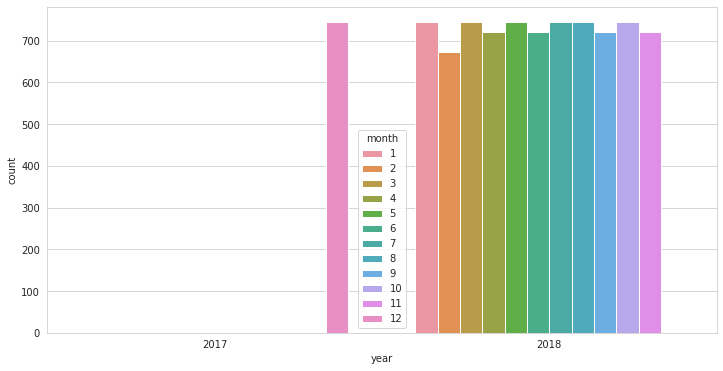

In [130]:
plt.figure(figsize =(12,6))
sns.countplot(x= 'year',hue='month',data=df)

**in our data set the year 2017ts only december is present and in 2018 jan to nove is present**

**b) Count of Functioning Day:**

In [131]:
Functioning_day = df[df['Functioning Day'] == 'Yes']
no_Functioning_day = df[df['Functioning Day'] == 'No']
# Functioning_day.head()
# no_Functioning_day.head()

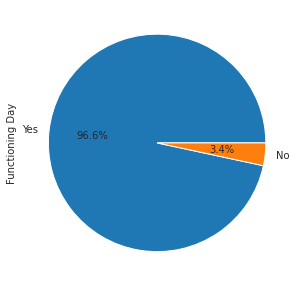

In [132]:
# Percentage of  present in our data set
sns.set_style('whitegrid')
plot = df["Functioning Day"].value_counts().plot.pie(x ='Yes', y = 'No' , autopct='%1.1f%%', figsize=(5,5))

**The "No" Functioning day are less ni count in our data set**

**c)Count of Holiday :**

In [133]:
Holi_day = df[df['Holiday'] == 'Holiday']
no_Holi_day = df[df['Holiday'] == 'No Holiday']
# Holi_day.head()
# no_Functioning_day.head()

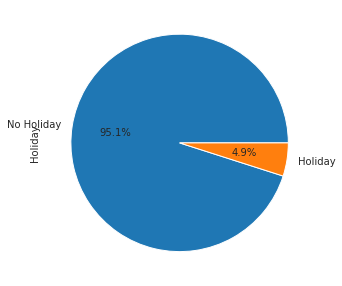

In [134]:
sns.set_style('whitegrid')
plot = df["Holiday"].value_counts().plot.pie(x ='No Holiday	', y = 'Holiday' , autopct='%1.1f%%', figsize=(5,5))

**percentage of holiday is less then no holiday.**

**e)Year wise Holiday count:**

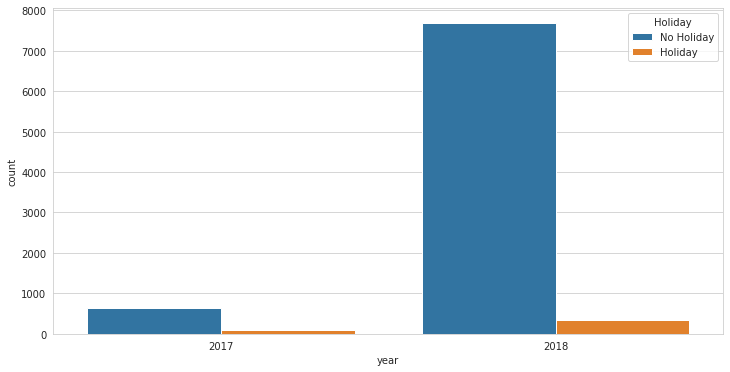

In [135]:
plt.figure(figsize =(12,6))
sns.countplot(x= 'year',hue='Holiday',data=df)

By the help of year . We clrarly count that holiday is less then no holiday.

**f) Season wise - Snowfall, Rainfall, Solar_Radiation, Dew_point_temp effectts on Rent_count**




In [136]:
imp = df.groupby(['month', 'Seasons'],as_index=False).agg({'Snowfall':"sum","Rainfall":"sum","Solar_Radiation":"sum","Dew_point_temp":"sum","Rent_count":"mean"}).sort_values(by='month')
imp

month Seasons  Snowfall  Rainfall  Solar_Radiation  Dew_point_temp  \
0       1  Winter     190.0       8.5           168.70        -10351.9   
1       2  Winter      68.6      27.6           323.68         -8771.8   
2       3  Spring       0.0      51.5           446.41          -201.4   
3       4  Spring       0.0     130.3           513.19          1814.8   
4       5  Spring       0.0     222.0           561.24          7483.7   
5       6  Summer       0.0     171.5           602.59         10638.7   
6       7  Summer       0.0     185.6           561.10         15308.9   
7       8  Summer       0.0     202.6           517.16         15452.7   
8       9  Autumn       0.0      68.5           470.96          9293.9   
9      10  Autumn       0.0     120.5           403.34          3387.5   
10     11  Autumn     123.0      79.1           265.35          -672.2   
11     12  Winter     276.0      34.8           151.69         -7696.3   

     Rent_count  
0    201.620968  
1    225.941964  
2    511.551075  
3    728.093056  
4    950.387097  
5   1245.676389  
6    987.177419  
7    876.192204  
8    935.572222  
9    874.563172  
10   646.826389  
11   249.099462

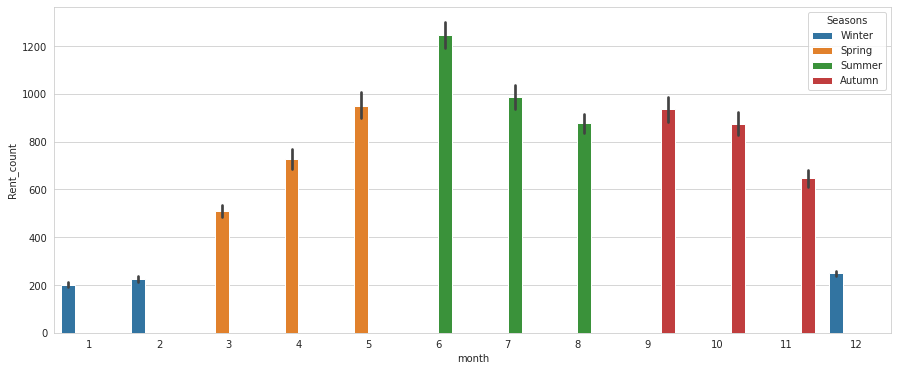

In [137]:
plt.figure(figsize =(15,6))
sns.barplot(x= 'month',y="Rent_count",hue = "Seasons",data=df)

**In this bar plot  ,summer  have more number of rent count.**

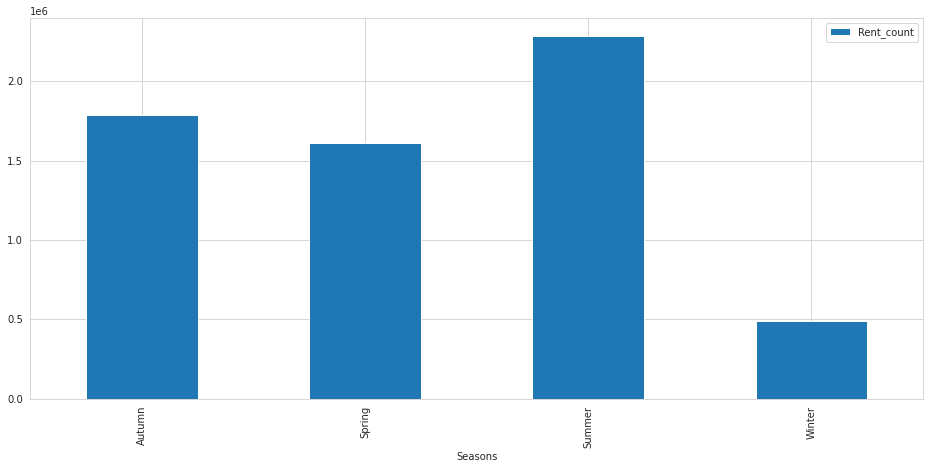

In [138]:
seasonly_booking = df.groupby('Seasons')['Rent_count'].sum().to_frame().plot(kind = 'bar',figsize=(16,7))
seasonly_booking

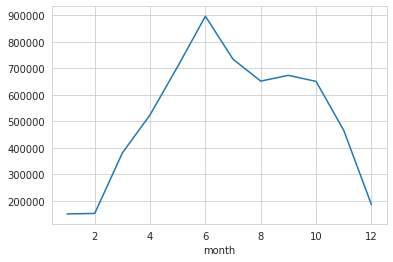

In [139]:
monthly_booking = df.groupby('month')['Rent_count'].sum()
monthly_booking.plot()

**Observation: the summer season and the month no-5,6,7,9 are the season in which the booking are heald.**

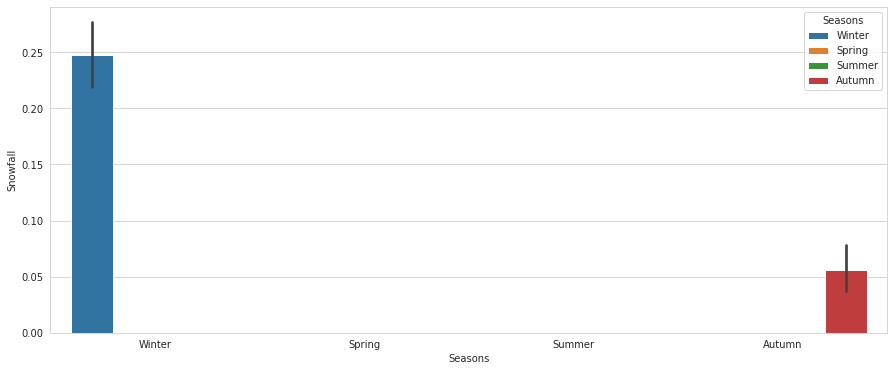

In [140]:
plt.figure(figsize =(15,6))
sns.barplot(x= 'Seasons',y="Snowfall",hue='Seasons',data=df)

**Observation : winter, autumn  has snowfall.**

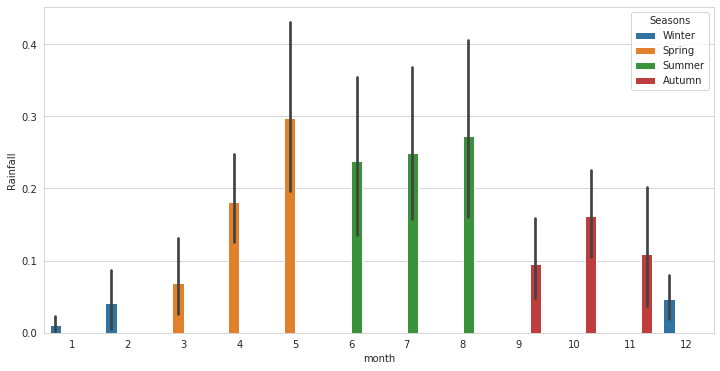

In [141]:
plt.figure(figsize =(12,6))
sns.barplot(x= 'month',y="Rainfall",hue='Seasons',data=df)

Observation: months(5,6,7,8) are more number of rainfall

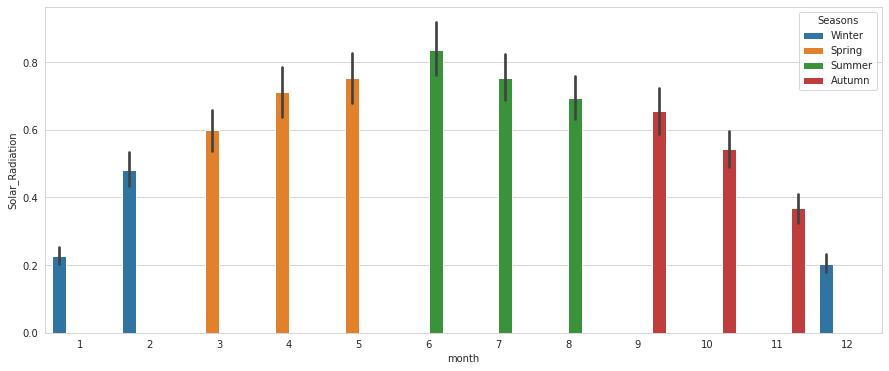

In [142]:
plt.figure(figsize =(15,6))
sns.barplot(x= 'month',y="Solar_Radiation",hue='Seasons',data=df)

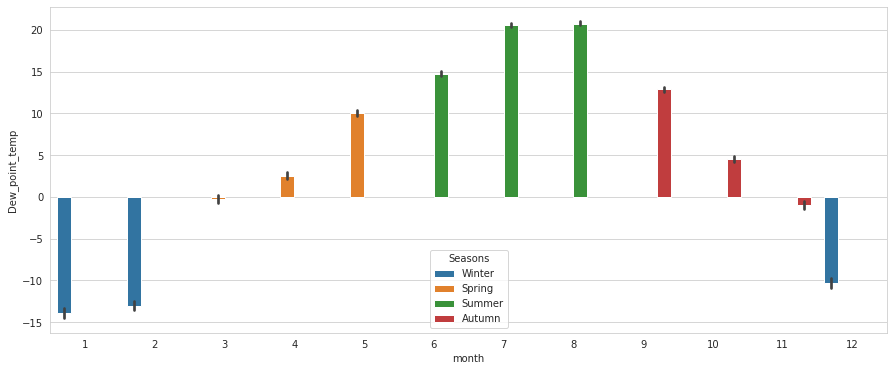

In [143]:
plt.figure(figsize =(15,6))
sns.barplot(x= 'month',y="Dew_point_temp",hue='Seasons',data=df)

In [144]:
print(f' the columns present in our data set are:\n {str(df.columns)}')
print('*'*100)


numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
print(str(f' the numerical features are:\n {numerical_features}'))
print('*'*100)


categorical_columns=list(df.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
print(str(f' the catagorical features are:\n {categorical_features}'))
categorical_features

 the columns present in our data set are:
 Index(['Date', 'Rent_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temp', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning Day', 'year', 'month',
       'day'],
      dtype='object')
****************************************************************************************************
 the numerical features are:
 Index(['Rent_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temp', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'year', 'month', 'day'],
      dtype='object')
****************************************************************************************************
 the catagorical features are:
 Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')


Index(['Seasons', 'Holiday', 'Functioning Day'], dtype='object')



---



---
# **Making a function to ploting and comparing with all independent varibale with the dependent variable**


In [145]:
def analysis(df,column):
  
  '''making a function to agrigation numerical
   value with the dependent values and ploting 
    the "scatterplot","barplot",'''

  # Making a data frame for each independent variable with the mean of dependent variable
  print(df.groupby([column]).agg({'Rent_count':"mean"}).sort_values(by=column,ascending = False))

  print("\n**************************************************************************************************************************\n")
  print(str('1.making a scatterplot for each independent variable with the mean of dependent variable').upper())
  print("\n**************************************************************************************************************************\n")
  # making a scatterplot for each independent variable with the mean of dependent variable
  f1=df[column].unique()
  f2=df.groupby([column])['Rent_count'].mean()
  plt.figure(figsize = (18, 7))
  sns.scatterplot(f1,f2,color='r')
  plt.xlabel(column, fontsize = 15)
  plt.ylabel('Rent_count', fontsize = 15)
  plt.show()

  print("\n**************************************************************************************************************************\n")
  print(str('2.making a scatterplot for each independent variable with out mean of dependent variable').upper())
  print("\n**************************************************************************************************************************\n")
  plt.scatter(df[column], df['Rent_count'], alpha=0.5,marker ="+",color = 'indigo')
  plt.rcParams['figure.figsize'] = (18, 7)
  # plt.figure(figsize = (18, 7))
  # plt.xlabel(column)
  # plt.ylabel('Rent_count')
  plt.show()

  print("\n**************************************************************************************************************************\n")
  print(str('3.making a barplot for each independent variable with the mean of dependent variable').upper())
  print("\n**************************************************************************************************************************\n")
  # making a barplot for each independent variable with the mean of dependent variable
  ((df.groupby([column])['Rent_count'].mean())).sort_values(ascending = False).head(6).plot.bar(color = ['violet','indigo','b','g','y','orange','r'])
  # plt.figure(figsize = (18, 7))
  plt.rcParams['figure.figsize'] = (18, 7)
  plt.xlabel(column, fontsize = 15)
  plt.ylabel('Rent_count', fontsize = 15)
  plt.show()

  print("\n**************************************************************************************************************************\n")
  print(str('4.making a barplot for each unique independent variable with the  average of dependent variable').upper())
  print("\n**************************************************************************************************************************\n")
  # making a barplot for each unique independent variable with the  average of dependent variable
  plt.figure(figsize = (18, 7))
  unique=df.groupby([column])['Rent_count'].mean()
  plt.bar(df[column].unique(),unique)
  plt.show()

  print("\n**************************************************************************************************************************\n")
  print(str('5.plot a bar plot for each numerical feature count (except dependent_variable)').upper())
  print("\n**************************************************************************************************************************\n")
  # # plot a bar plot for each numerical feature count (except dependent_variable)
  fig = plt.figure(figsize=(18, 7))
  ax = fig.gca()
  feature = df[column]
  feature.hist(bins=50, ax = ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
  ax.set_title(column)
  plt.show()

             Rent_count
Temperature            
 39.4             561.0
 39.3             531.0
 39.0            1033.0
 38.7             475.0
 38.0            1184.0
...                 ...
-16.5              96.0
-16.9              36.0
-17.4              64.0
-17.5             145.5
-17.8             322.0

[546 rows x 1 columns]

**************************************************************************************************************************

1.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



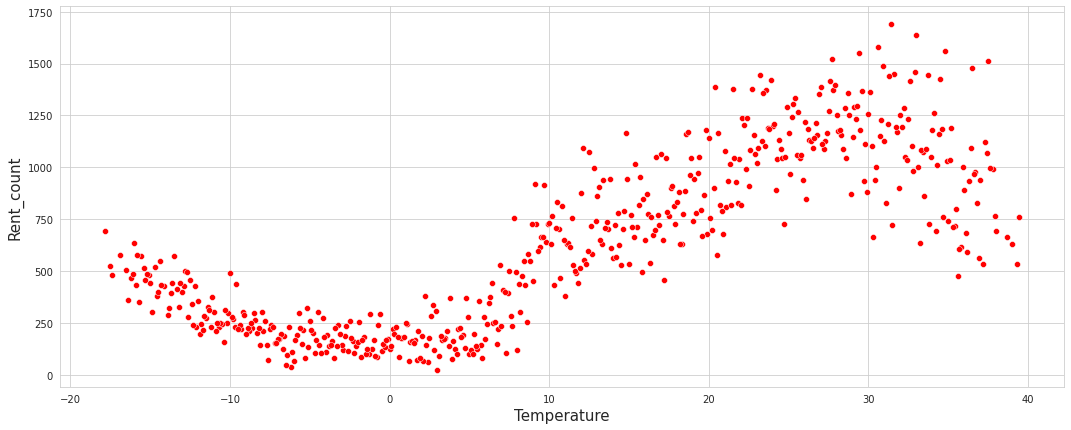


**************************************************************************************************************************

2.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH OUT MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



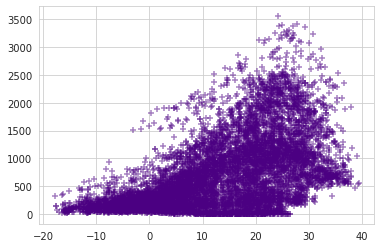


**************************************************************************************************************************

3.MAKING A BARPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



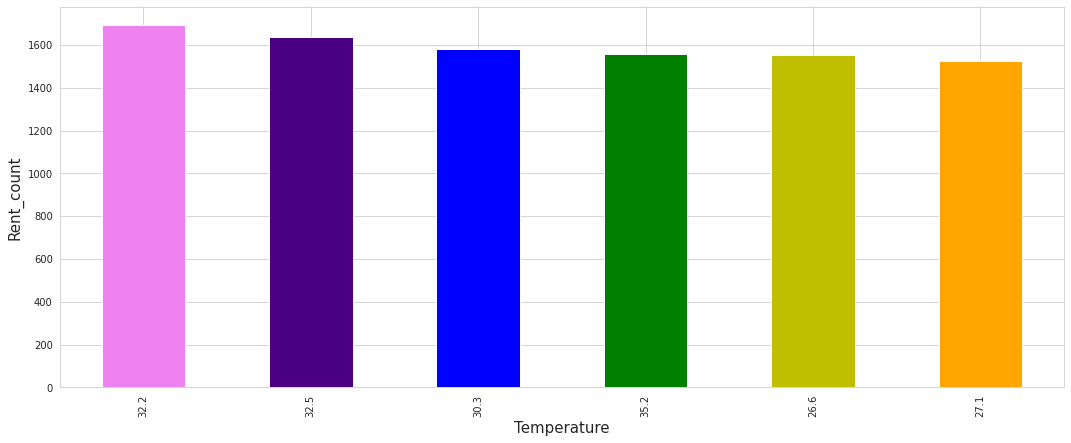


**************************************************************************************************************************

4.MAKING A BARPLOT FOR EACH UNIQUE INDEPENDENT VARIABLE WITH THE  AVERAGE OF DEPENDENT VARIABLE

**************************************************************************************************************************



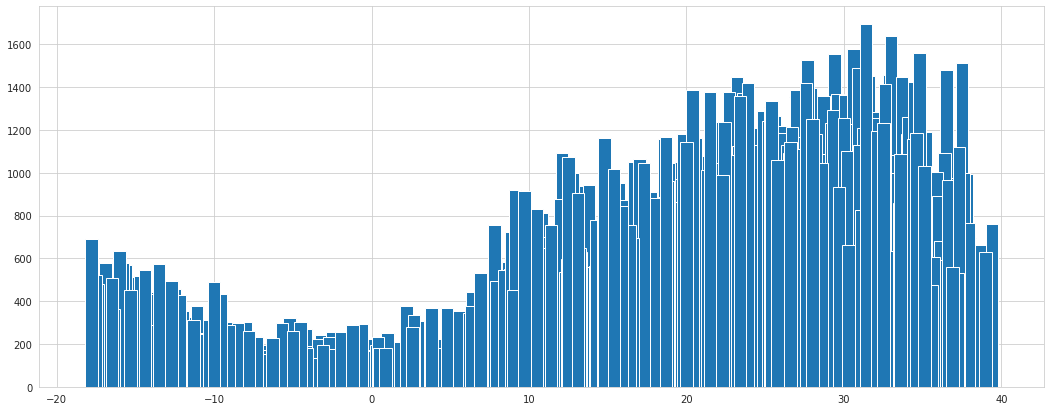


**************************************************************************************************************************

5.PLOT A BAR PLOT FOR EACH NUMERICAL FEATURE COUNT (EXCEPT DEPENDENT_VARIABLE)

**************************************************************************************************************************



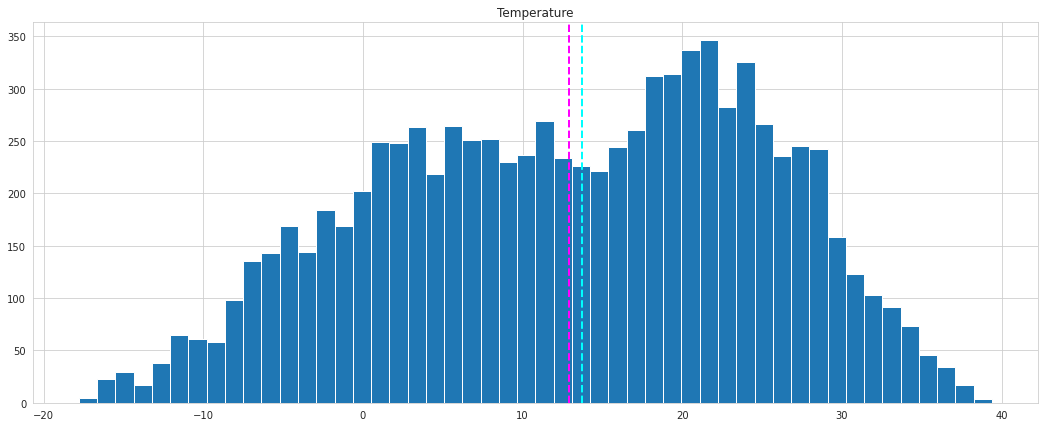

           Rent_count
Humidity             
98         172.320000
97         166.069364
96         170.828829
95         178.617647
94         253.129630
...               ...
13        1451.000000
12        2032.000000
11        1986.000000
10        1315.000000
0          407.647059

[90 rows x 1 columns]

**************************************************************************************************************************

1.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



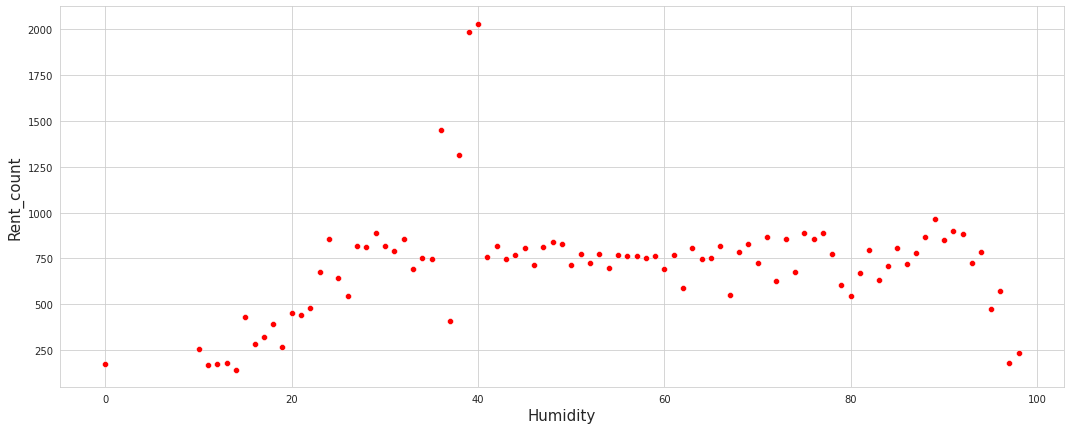


**************************************************************************************************************************

2.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH OUT MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



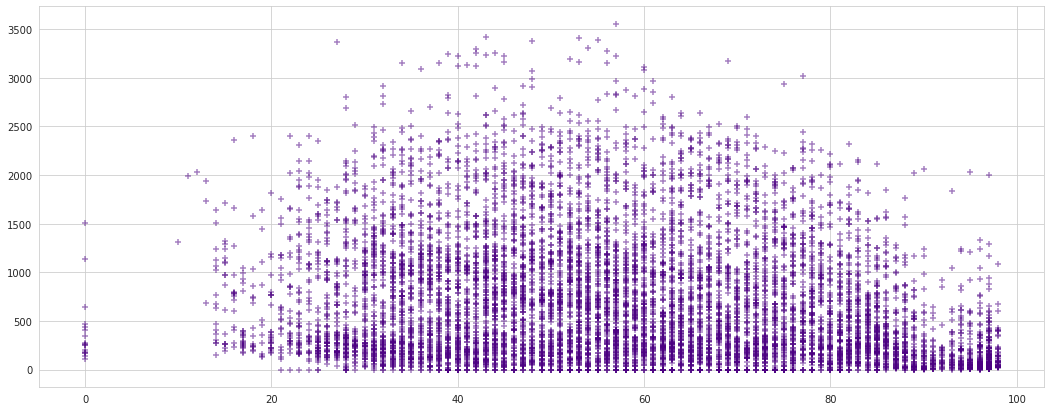


**************************************************************************************************************************

3.MAKING A BARPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



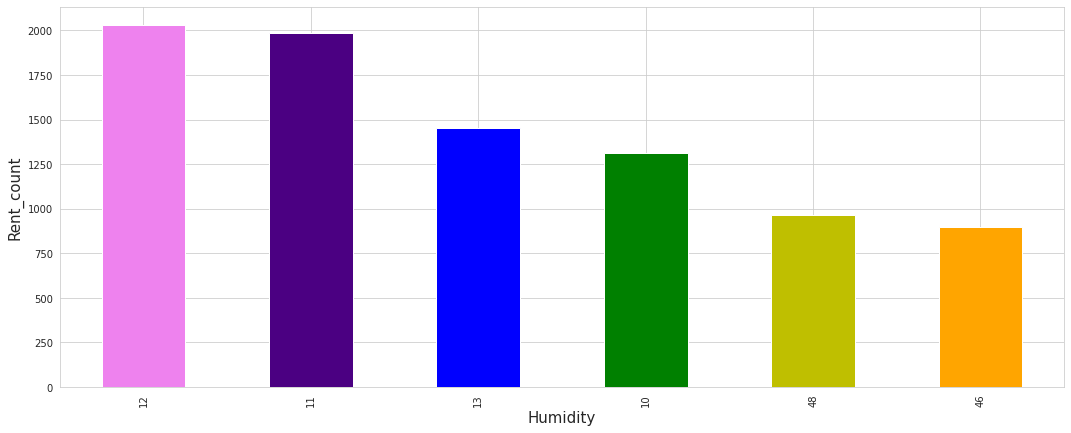


**************************************************************************************************************************

4.MAKING A BARPLOT FOR EACH UNIQUE INDEPENDENT VARIABLE WITH THE  AVERAGE OF DEPENDENT VARIABLE

**************************************************************************************************************************



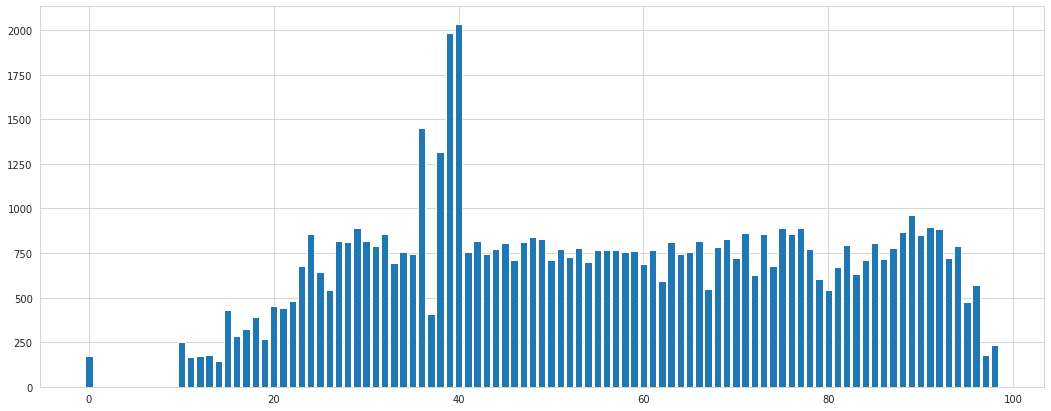


**************************************************************************************************************************

5.PLOT A BAR PLOT FOR EACH NUMERICAL FEATURE COUNT (EXCEPT DEPENDENT_VARIABLE)

**************************************************************************************************************************



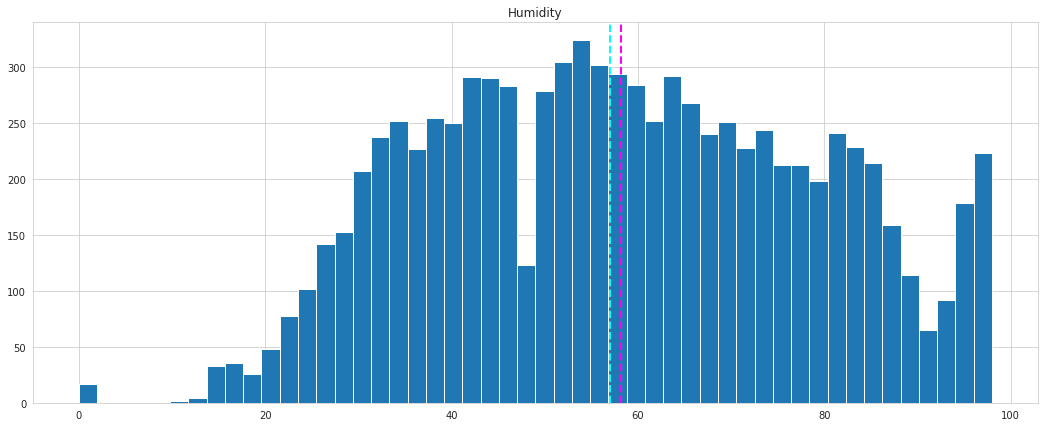

             Rent_count
Wind_speed             
7.4          913.000000
7.3          133.000000
7.2         1805.000000
6.9           49.000000
6.7          146.000000
...                 ...
0.4          470.731183
0.3          454.867089
0.2          498.011628
0.1          591.040816
0.0          448.027027

[65 rows x 1 columns]

**************************************************************************************************************************

1.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



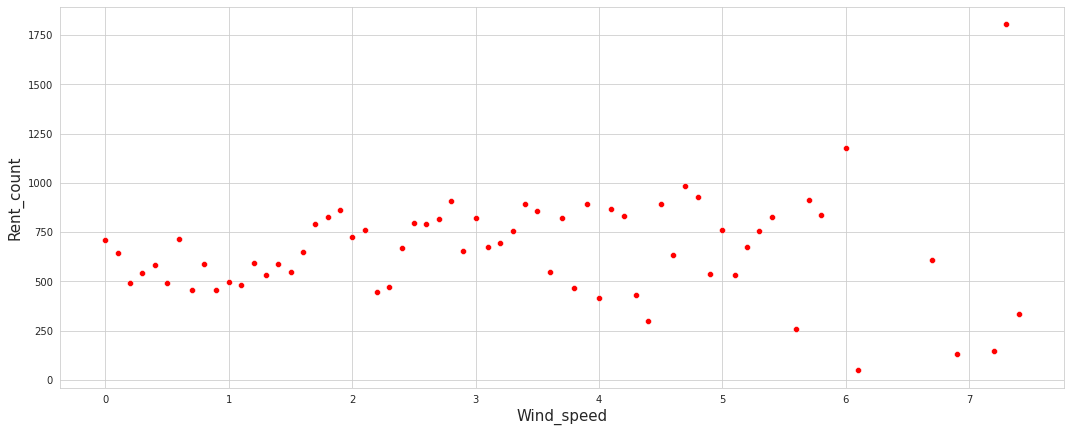


**************************************************************************************************************************

2.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH OUT MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



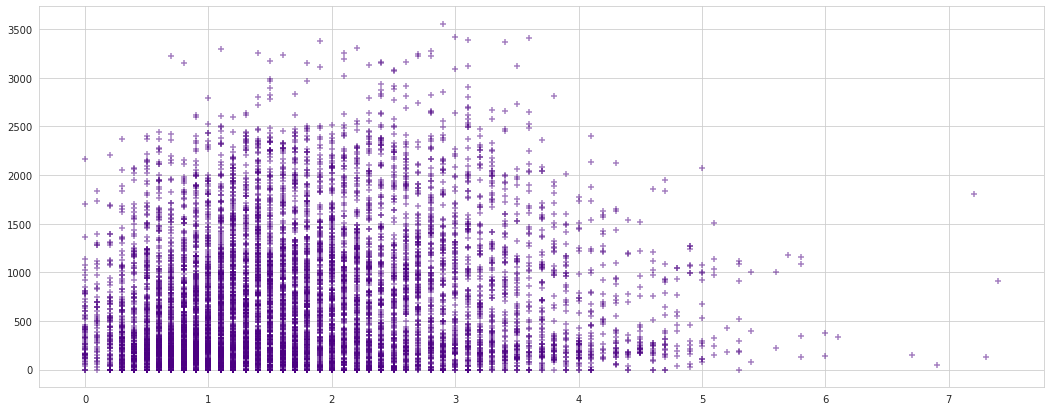


**************************************************************************************************************************

3.MAKING A BARPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



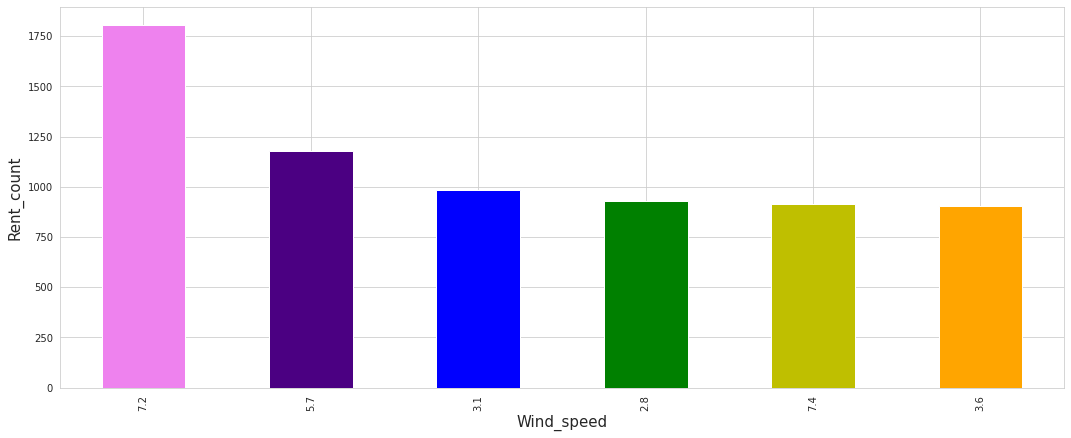


**************************************************************************************************************************

4.MAKING A BARPLOT FOR EACH UNIQUE INDEPENDENT VARIABLE WITH THE  AVERAGE OF DEPENDENT VARIABLE

**************************************************************************************************************************



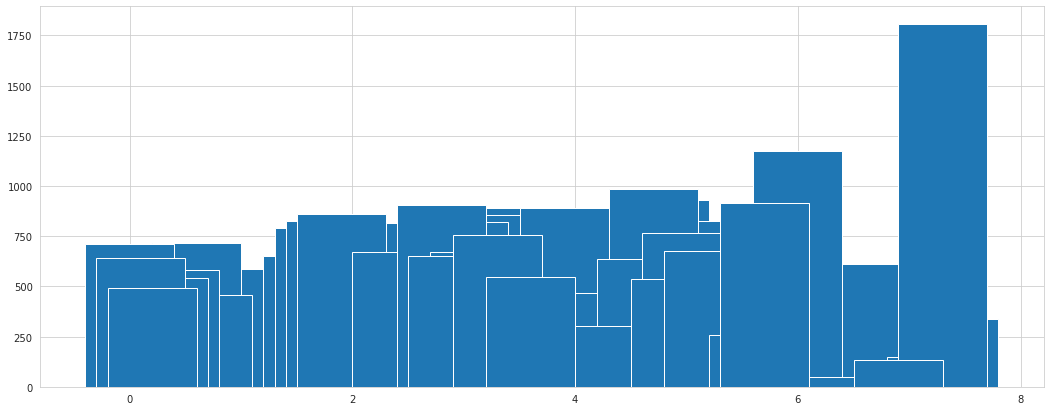


**************************************************************************************************************************

5.PLOT A BAR PLOT FOR EACH NUMERICAL FEATURE COUNT (EXCEPT DEPENDENT_VARIABLE)

**************************************************************************************************************************



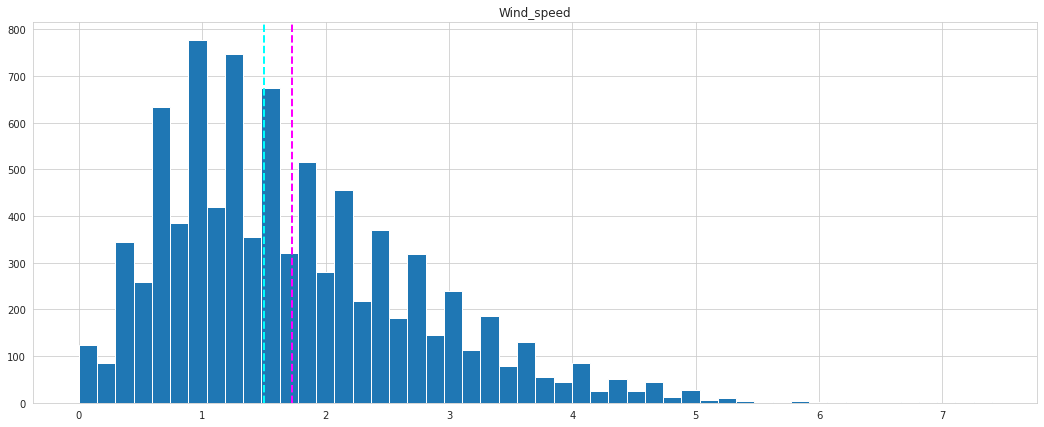

            Rent_count
Visibility            
2000        818.124722
1999        659.500000
1998        780.720000
1997        832.909091
1996        723.962963
...                ...
53           65.000000
38           98.000000
34           24.000000
33           33.000000
27           83.000000

[1789 rows x 1 columns]

**************************************************************************************************************************

1.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



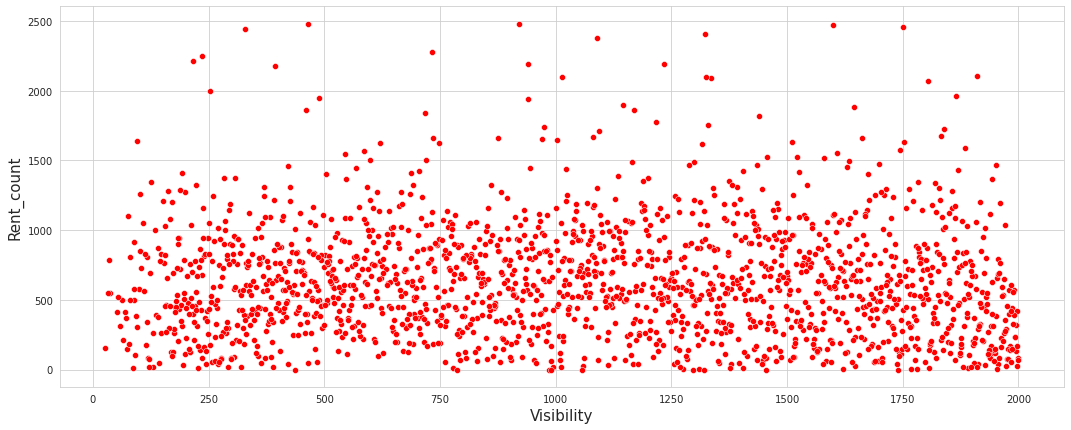


**************************************************************************************************************************

2.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH OUT MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



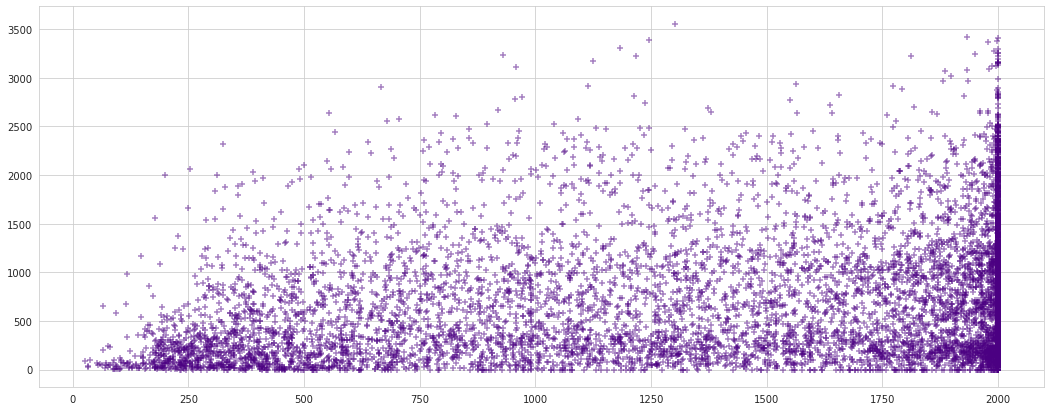


**************************************************************************************************************************

3.MAKING A BARPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



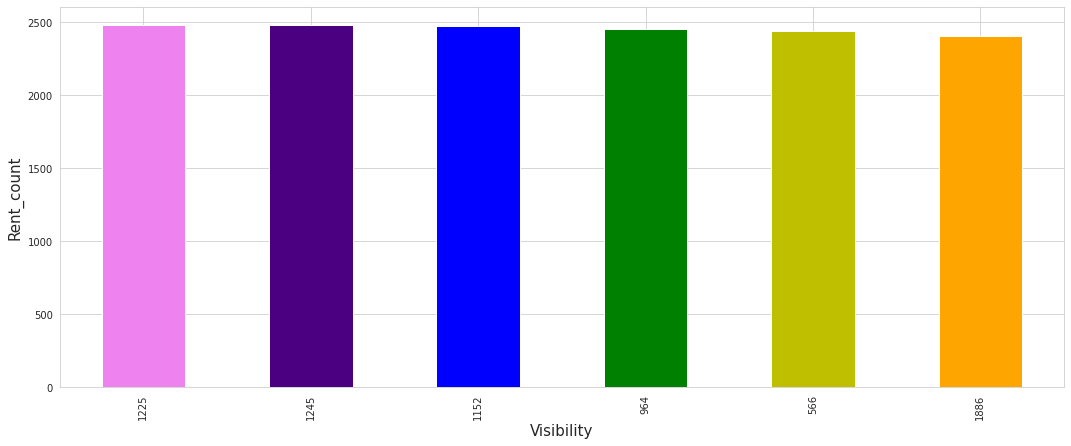


**************************************************************************************************************************

4.MAKING A BARPLOT FOR EACH UNIQUE INDEPENDENT VARIABLE WITH THE  AVERAGE OF DEPENDENT VARIABLE

**************************************************************************************************************************



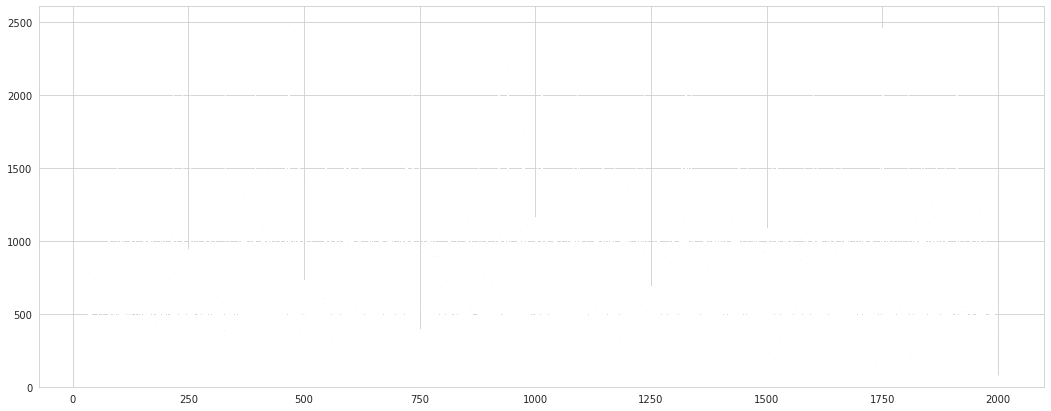


**************************************************************************************************************************

5.PLOT A BAR PLOT FOR EACH NUMERICAL FEATURE COUNT (EXCEPT DEPENDENT_VARIABLE)

**************************************************************************************************************************



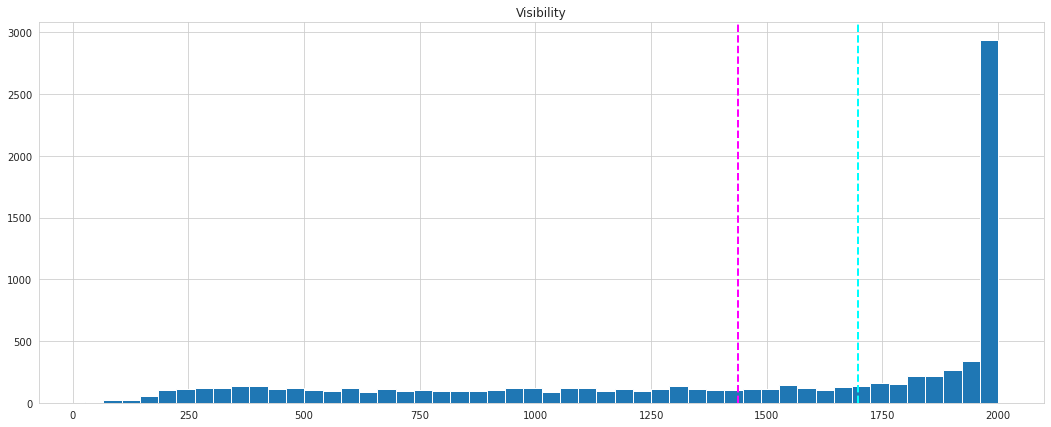

                 Rent_count
Dew_point_temp             
 27.2           1117.000000
 26.8            761.000000
 26.6            309.000000
 26.3            468.000000
 26.1            932.333333
...                     ...
-29.6             78.000000
-29.7             71.000000
-29.8            364.000000
-30.5            192.000000
-30.6             90.000000

[556 rows x 1 columns]

**************************************************************************************************************************

1.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



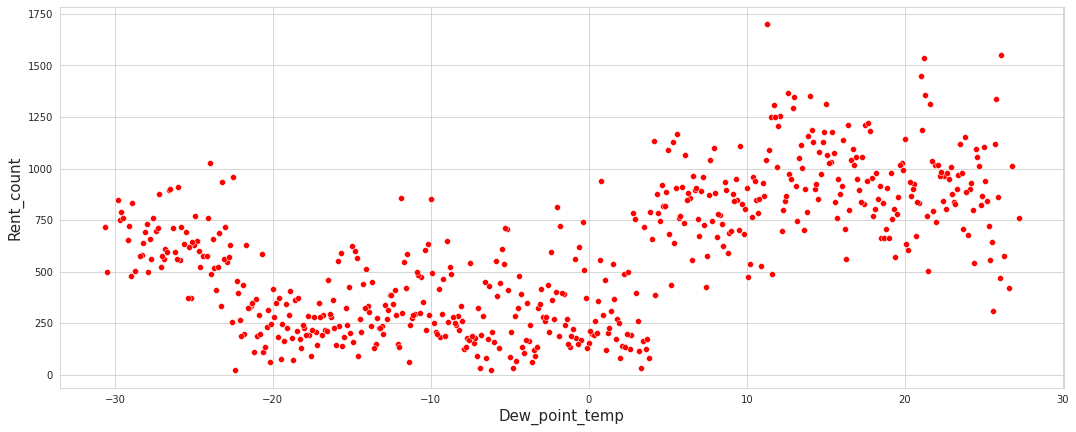


**************************************************************************************************************************

2.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH OUT MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



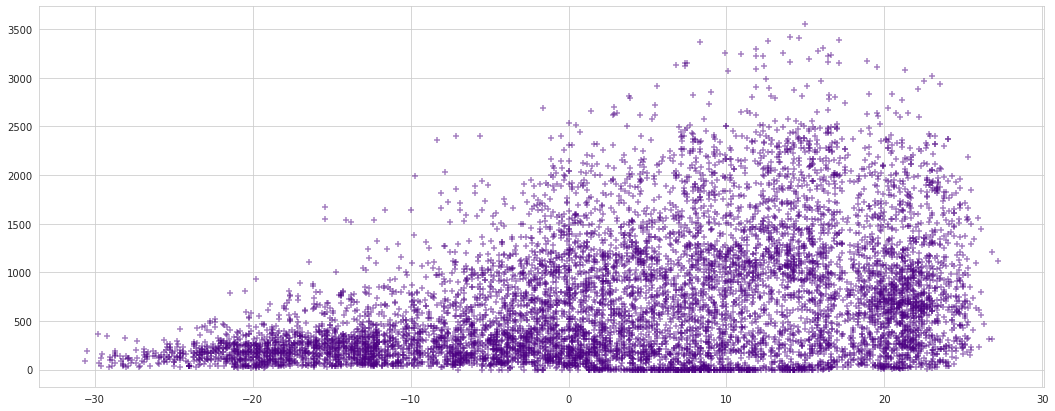


**************************************************************************************************************************

3.MAKING A BARPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



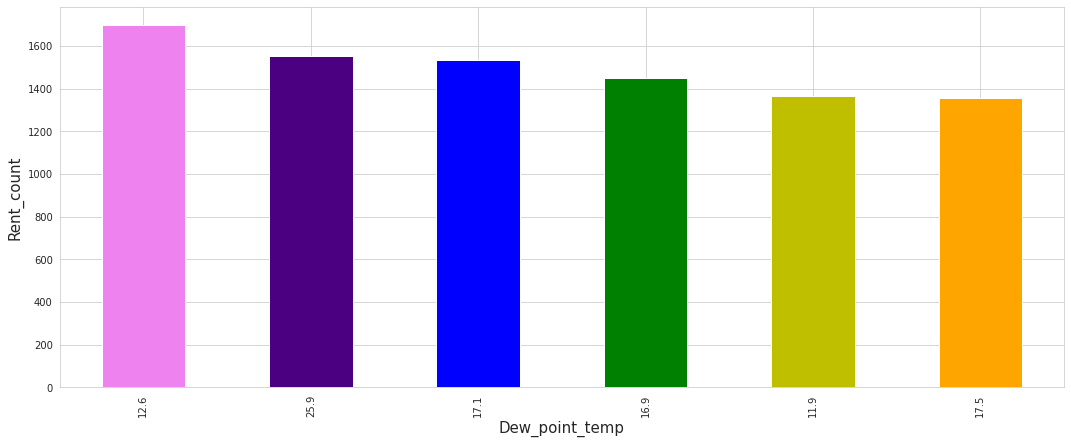


**************************************************************************************************************************

4.MAKING A BARPLOT FOR EACH UNIQUE INDEPENDENT VARIABLE WITH THE  AVERAGE OF DEPENDENT VARIABLE

**************************************************************************************************************************



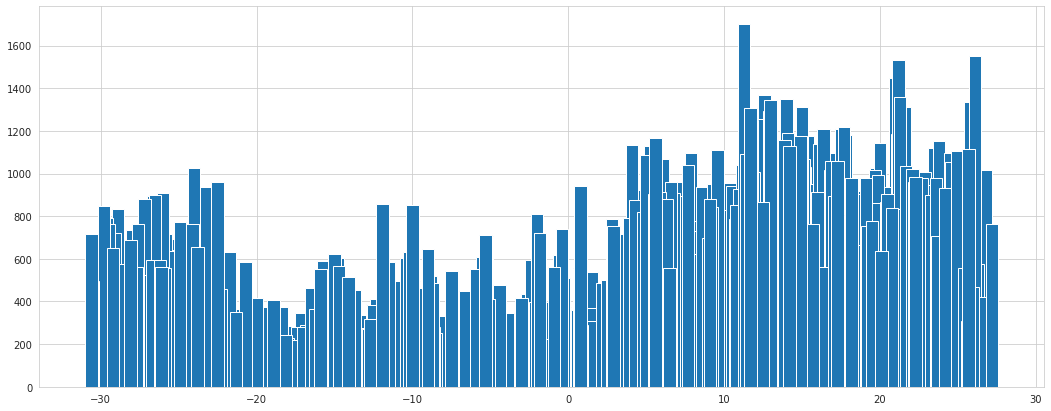


**************************************************************************************************************************

5.PLOT A BAR PLOT FOR EACH NUMERICAL FEATURE COUNT (EXCEPT DEPENDENT_VARIABLE)

**************************************************************************************************************************



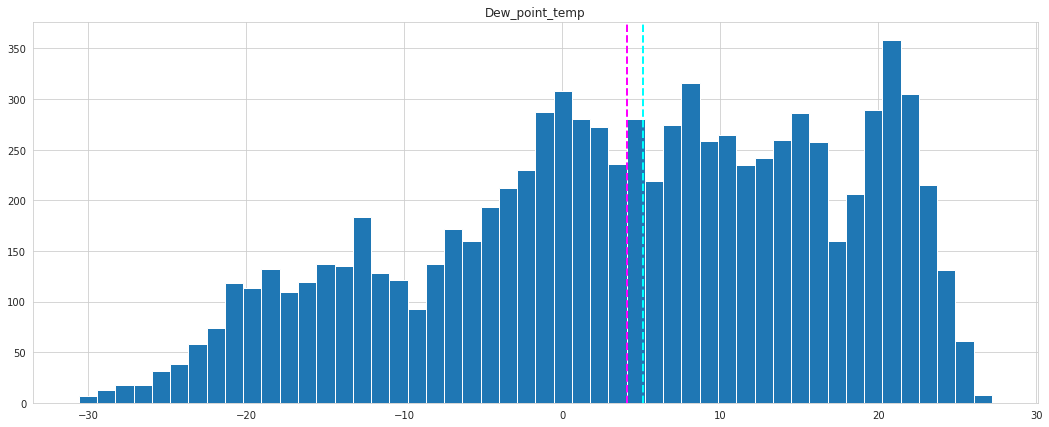

                  Rent_count
Solar_Radiation             
3.52             1516.000000
3.49             1456.000000
3.45              652.000000
3.44             1216.000000
3.42             1272.250000
...                      ...
0.04              766.361702
0.03              843.927536
0.02              800.524390
0.01              785.007812
0.00              487.064884

[345 rows x 1 columns]

**************************************************************************************************************************

1.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



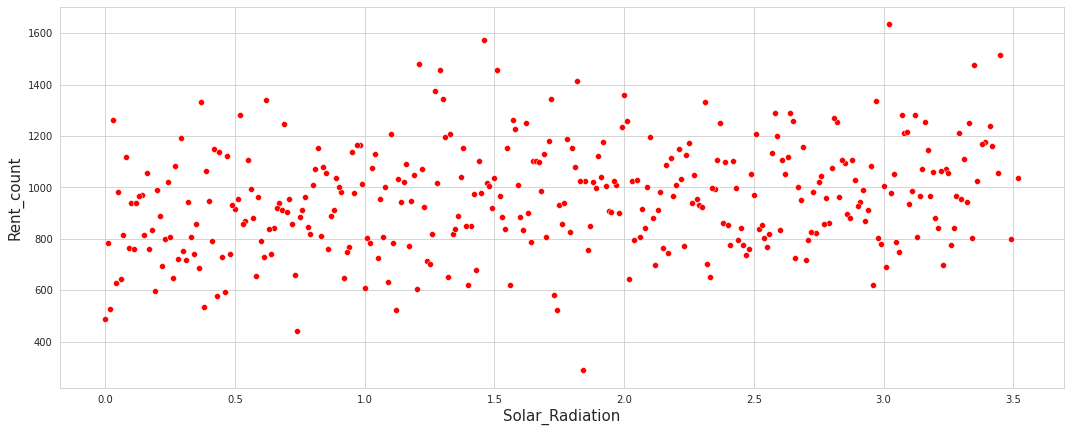


**************************************************************************************************************************

2.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH OUT MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



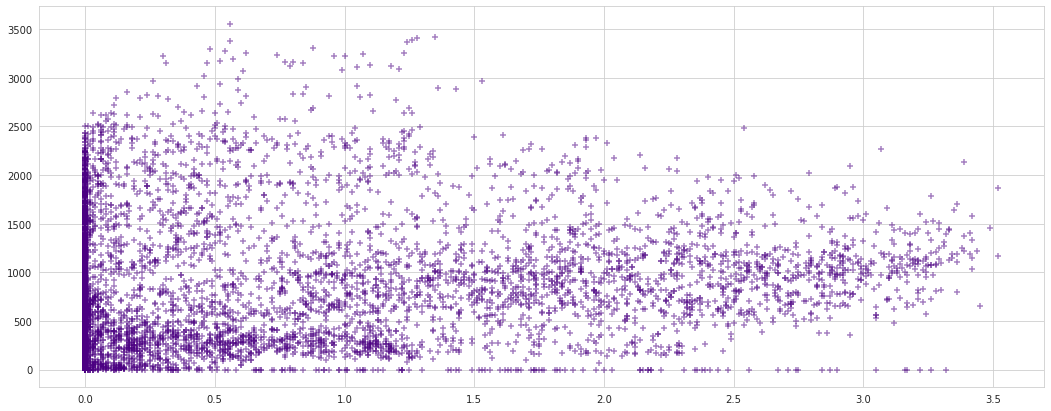


**************************************************************************************************************************

3.MAKING A BARPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



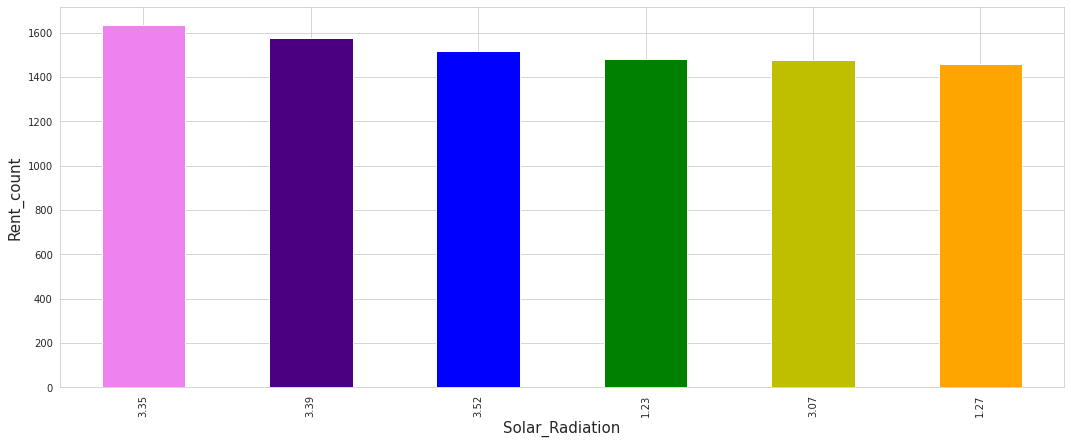


**************************************************************************************************************************

4.MAKING A BARPLOT FOR EACH UNIQUE INDEPENDENT VARIABLE WITH THE  AVERAGE OF DEPENDENT VARIABLE

**************************************************************************************************************************



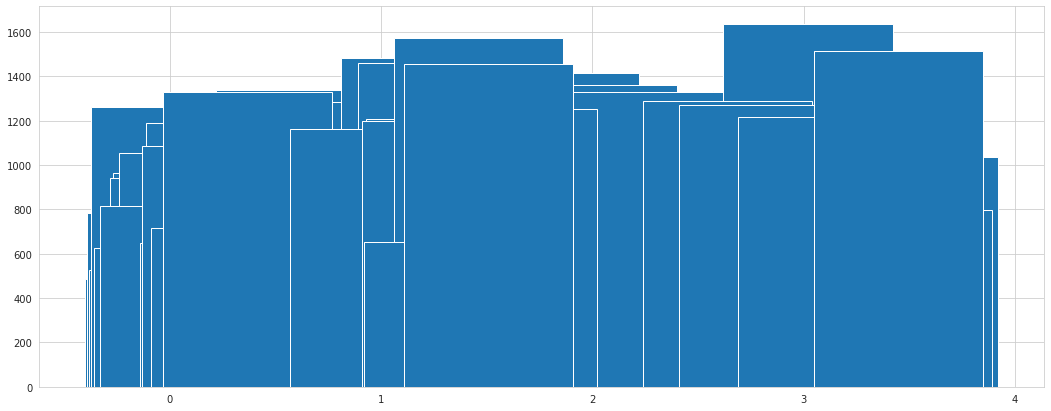


**************************************************************************************************************************

5.PLOT A BAR PLOT FOR EACH NUMERICAL FEATURE COUNT (EXCEPT DEPENDENT_VARIABLE)

**************************************************************************************************************************



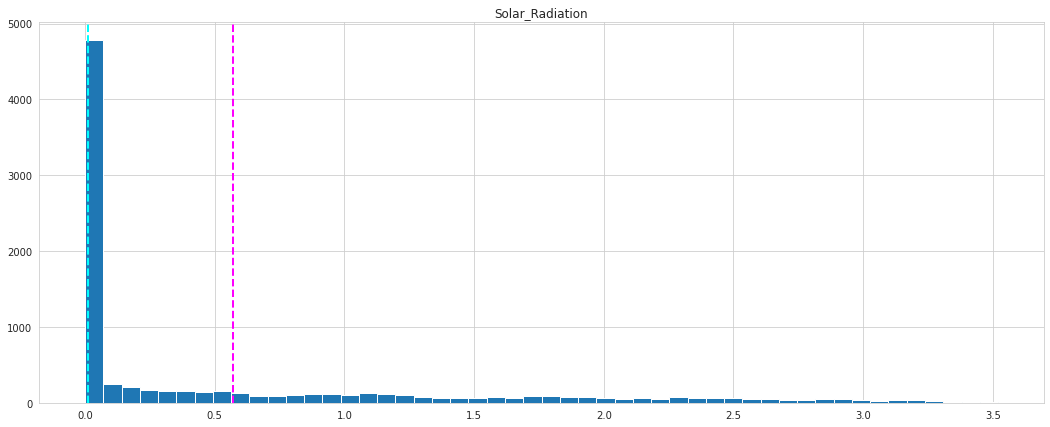

          Rent_count
Rainfall            
35.0      151.000000
29.5      122.000000
24.0       61.000000
21.5      596.000000
21.0       19.000000
...              ...
0.4       134.187500
0.3       155.666667
0.2       185.300000
0.1       329.978261
0.0       739.311103

[61 rows x 1 columns]

**************************************************************************************************************************

1.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



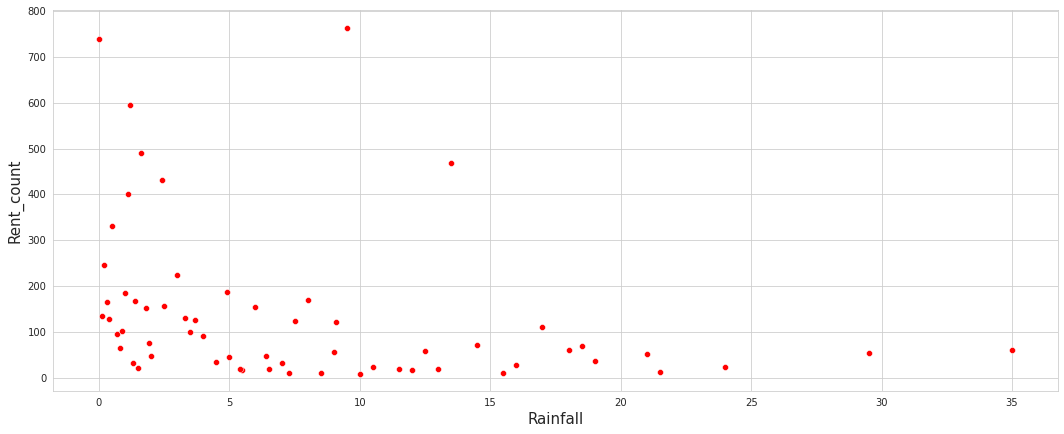


**************************************************************************************************************************

2.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH OUT MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



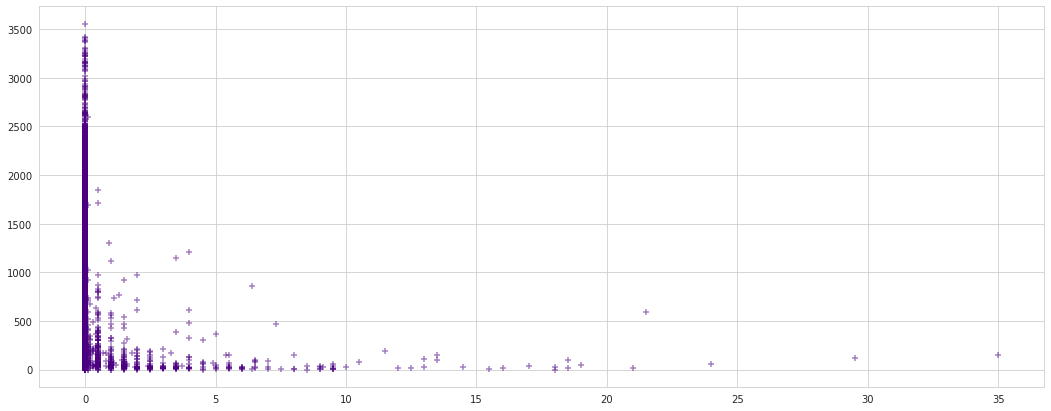


**************************************************************************************************************************

3.MAKING A BARPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



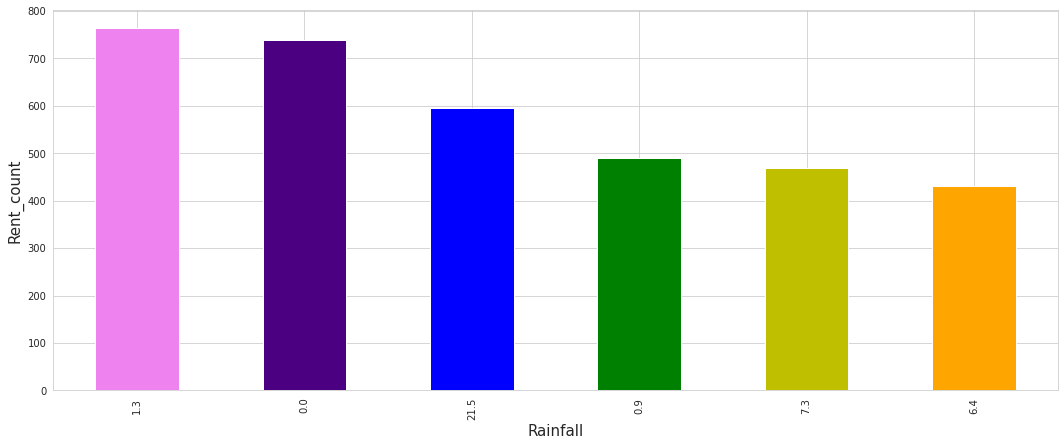


**************************************************************************************************************************

4.MAKING A BARPLOT FOR EACH UNIQUE INDEPENDENT VARIABLE WITH THE  AVERAGE OF DEPENDENT VARIABLE

**************************************************************************************************************************



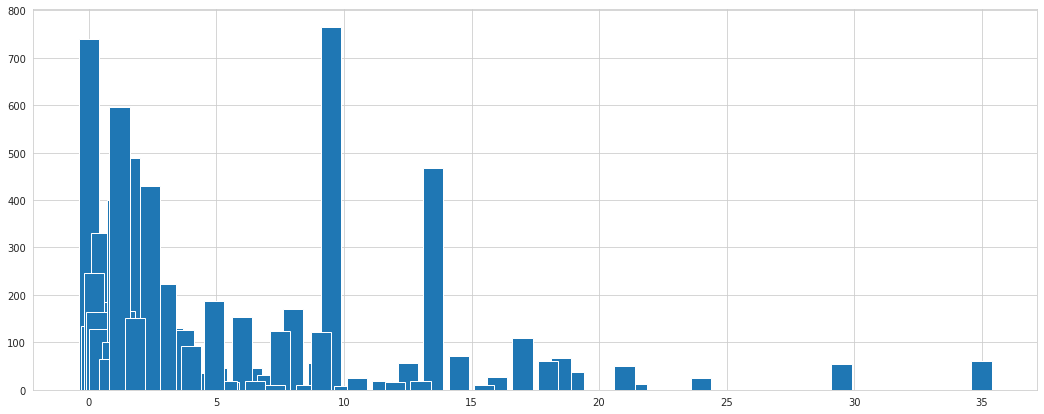


**************************************************************************************************************************

5.PLOT A BAR PLOT FOR EACH NUMERICAL FEATURE COUNT (EXCEPT DEPENDENT_VARIABLE)

**************************************************************************************************************************



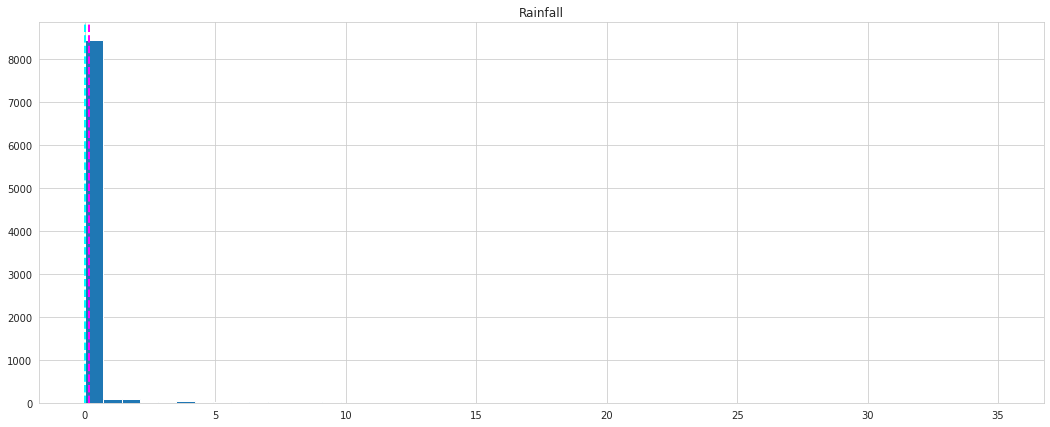

          Rent_count
Snowfall            
8.8        88.000000
7.1        24.000000
7.0       167.000000
6.0       241.000000
5.1        62.000000
5.0       187.000000
4.8        40.000000
4.3        25.000000
4.2       116.000000
4.1       114.750000
4.0        40.000000
3.9        47.000000
3.8        92.000000
3.7       263.000000
3.6       436.000000
3.5       132.571429
3.4       183.500000
3.3       280.333333
3.2       256.750000
3.1       119.000000
3.0       233.800000
2.9       327.500000
2.8       177.500000
2.7       168.166667
2.6       108.583333
2.5       198.000000
2.4       264.000000
2.3       299.000000
2.2       211.833333
2.1       182.000000
2.0       190.500000
1.9       234.333333
1.8       310.200000
1.7       251.333333
1.6       198.473684
1.5       168.000000
1.4       214.500000
1.3       273.000000
1.2        54.375000
1.1       366.000000
1.0       163.000000
0.9       142.764706
0.8       256.000000
0.7       164.774194
0.6       185.000000
0.5       138

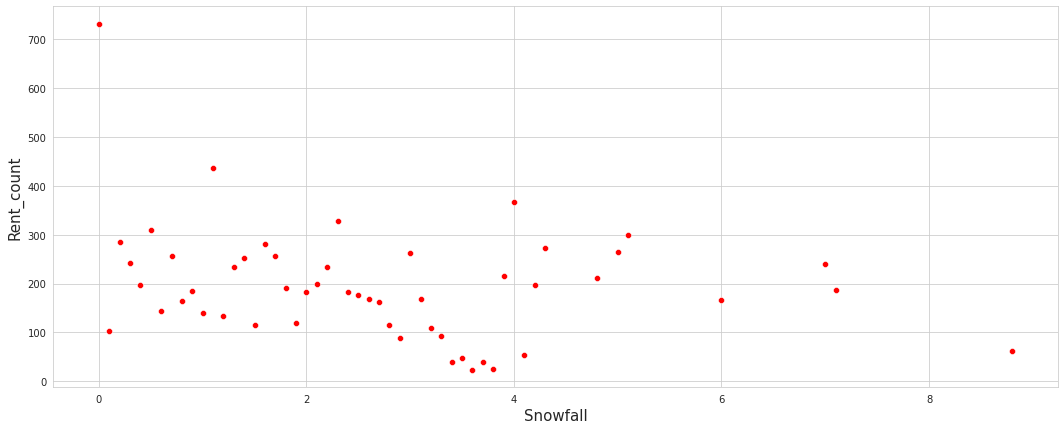


**************************************************************************************************************************

2.MAKING A SCATTERPLOT FOR EACH INDEPENDENT VARIABLE WITH OUT MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



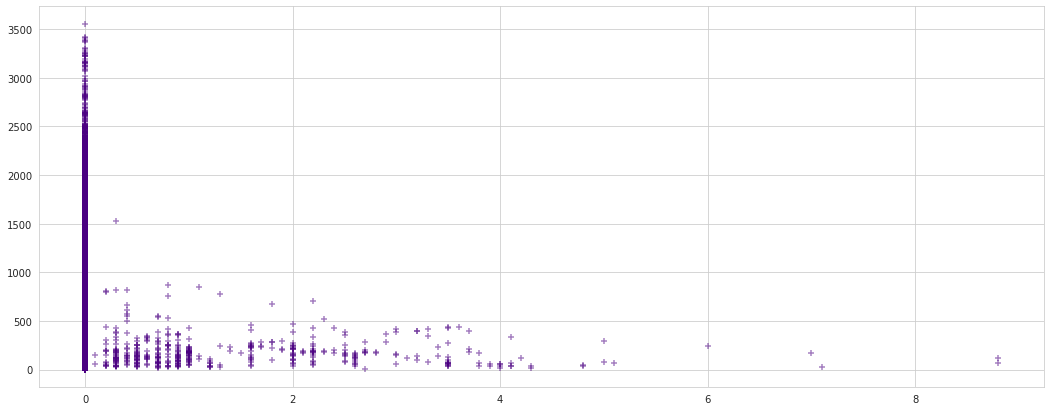


**************************************************************************************************************************

3.MAKING A BARPLOT FOR EACH INDEPENDENT VARIABLE WITH THE MEAN OF DEPENDENT VARIABLE

**************************************************************************************************************************



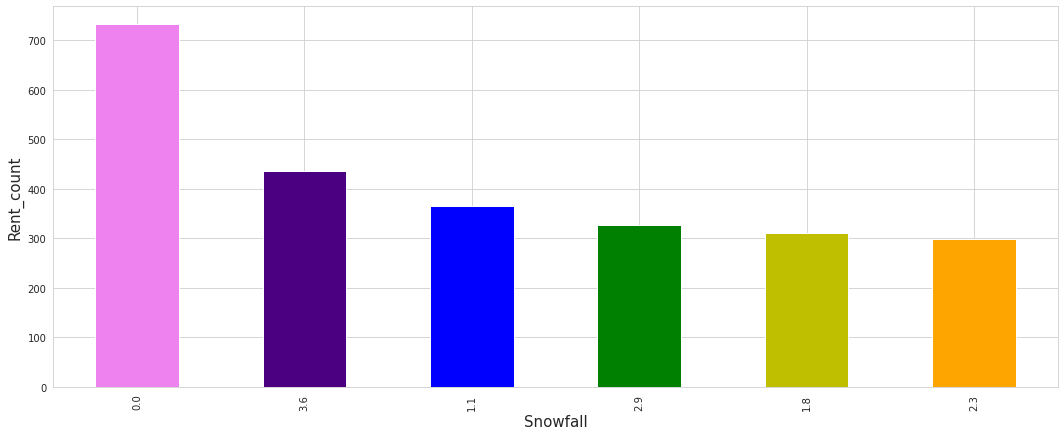


**************************************************************************************************************************

4.MAKING A BARPLOT FOR EACH UNIQUE INDEPENDENT VARIABLE WITH THE  AVERAGE OF DEPENDENT VARIABLE

**************************************************************************************************************************



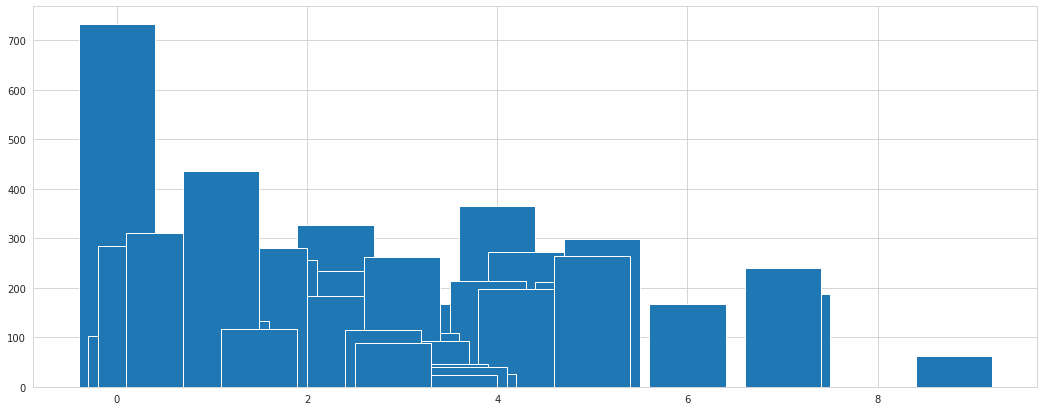


**************************************************************************************************************************

5.PLOT A BAR PLOT FOR EACH NUMERICAL FEATURE COUNT (EXCEPT DEPENDENT_VARIABLE)

**************************************************************************************************************************



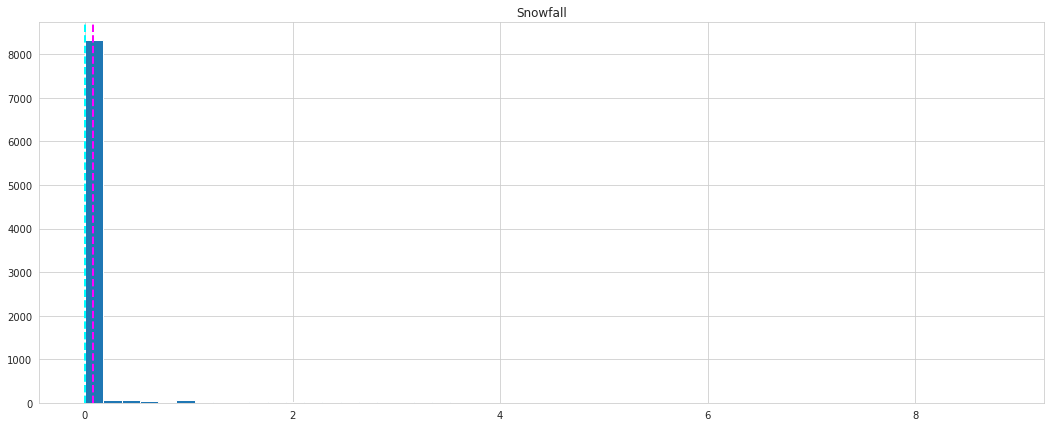

In [146]:
for column in numerical_columns[2:10]:
  # print(column)
  analysis(df,column)

# **DATA PREPRATION FOR LINEAR REGRESSION:**

In [147]:
df.head()

Date  Rent_count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0 2017-12-01         254     0         -5.2        37         2.2        2000   
1 2017-12-01         204     1         -5.5        38         0.8        2000   
2 2017-12-01         173     2         -6.0        39         1.0        2000   
3 2017-12-01         107     3         -6.2        40         0.9        2000   
4 2017-12-01          78     4         -6.0        36         2.3        2000   

   Dew_point_temp  Solar_Radiation  Rainfall  Snowfall Seasons     Holiday  \
0           -17.6              0.0       0.0       0.0  Winter  No Holiday   
1           -17.6              0.0       0.0       0.0  Winter  No Holiday   
2           -17.7              0.0       0.0       0.0  Winter  No Holiday   
3           -17.6              0.0       0.0       0.0  Winter  No Holiday   
4           -18.6              0.0       0.0       0.0  Winter  No Holiday   

  Functioning Day  year  month  day  
0             Yes  2017     12    1  
1             Yes  2017     12    1  
2             Yes  2017     12    1  
3             Yes  2017     12    1  
4             Yes  2017     12    1

# **a)Linear Assumption:**

Linear regression assumes that the relationship between your independent and dependent is linear. It does not support anything else. This may be obvious, but it is good to remember when you have a lot of attributes. You may need to transform data to make the relationship linear (e.g. log transform for an exponential relationship).

****************************************************************************************************
RENT_COUNT
****************************************************************************************************


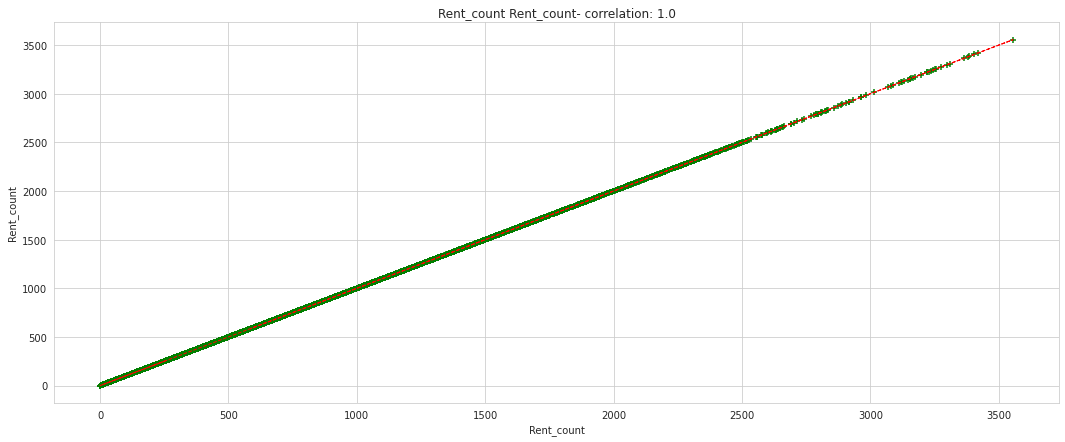

****************************************************************************************************
HOUR
****************************************************************************************************


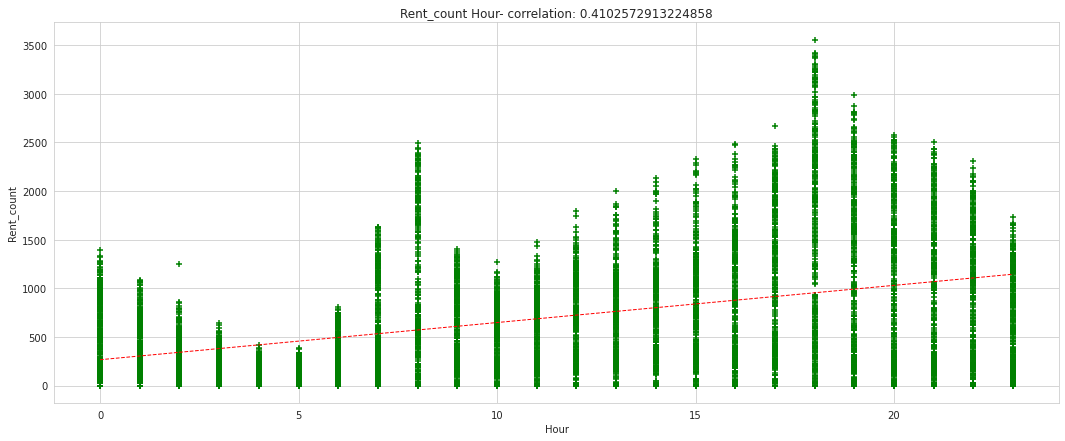

****************************************************************************************************
TEMPERATURE
****************************************************************************************************


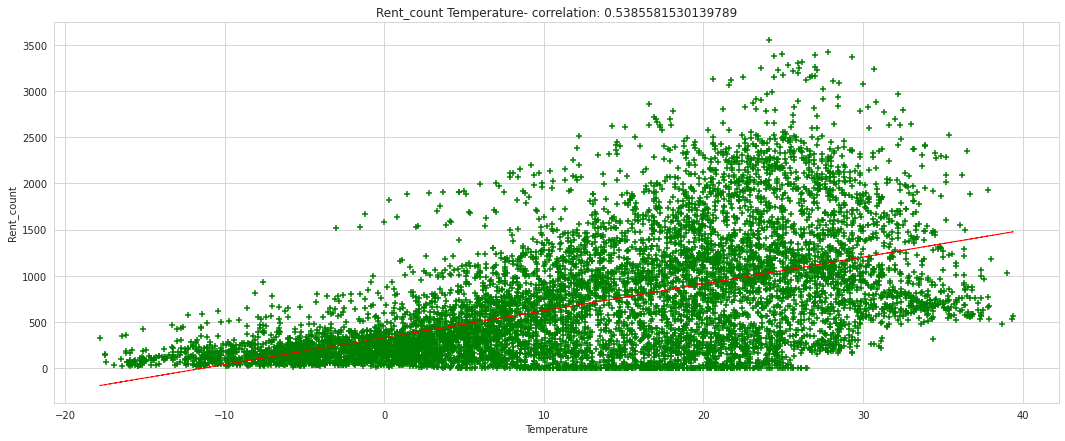

****************************************************************************************************
HUMIDITY
****************************************************************************************************


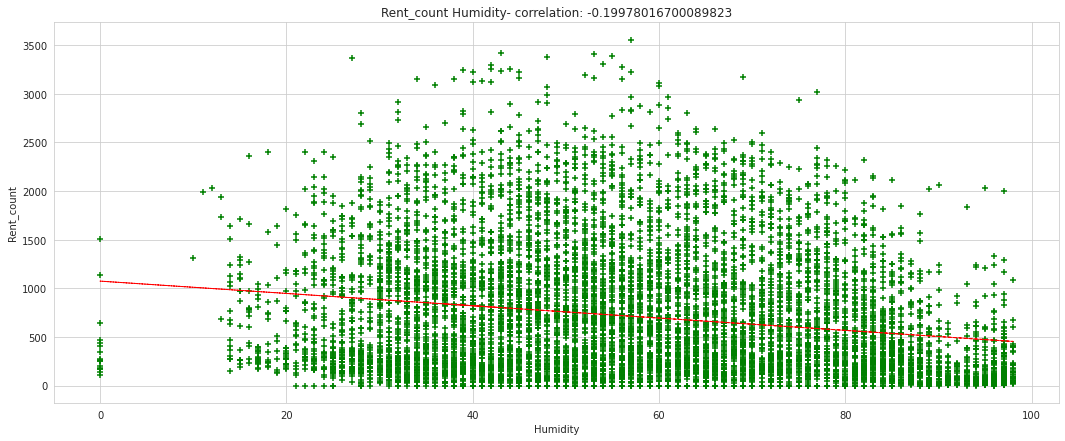

****************************************************************************************************
WIND_SPEED
****************************************************************************************************


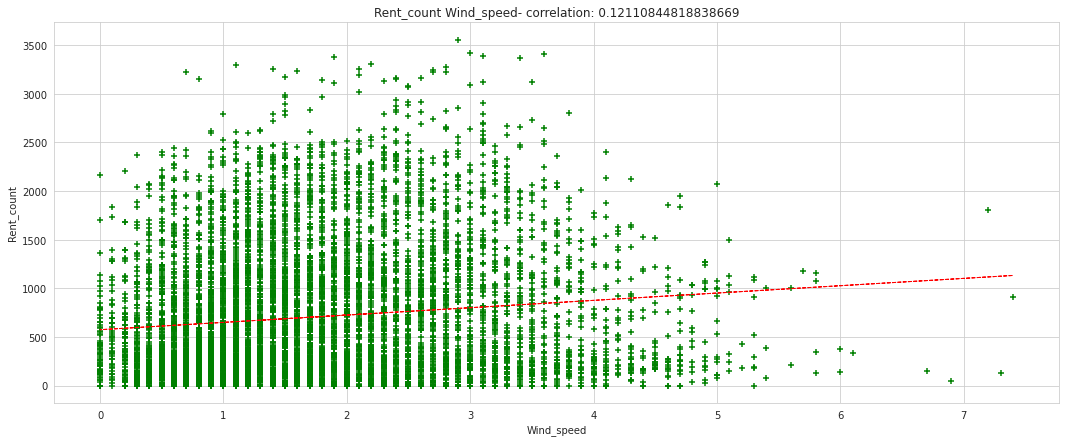

****************************************************************************************************
VISIBILITY
****************************************************************************************************


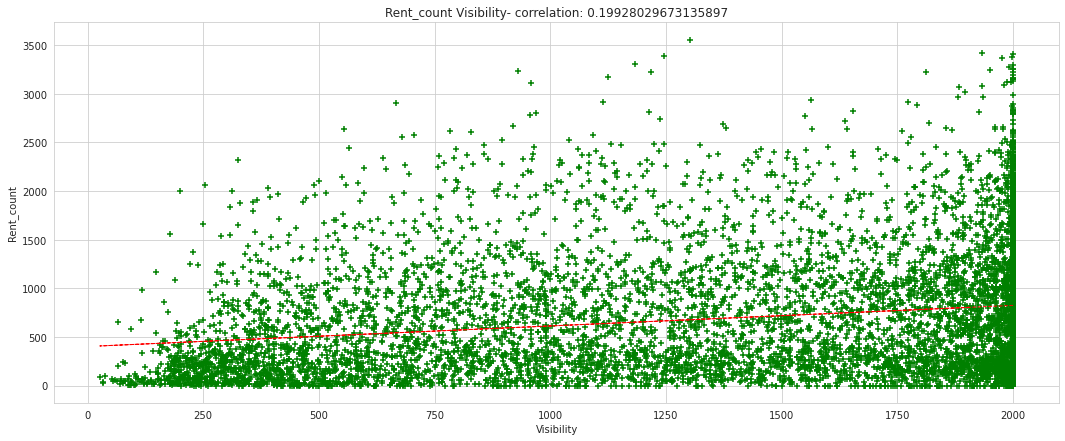

****************************************************************************************************
DEW_POINT_TEMP
****************************************************************************************************


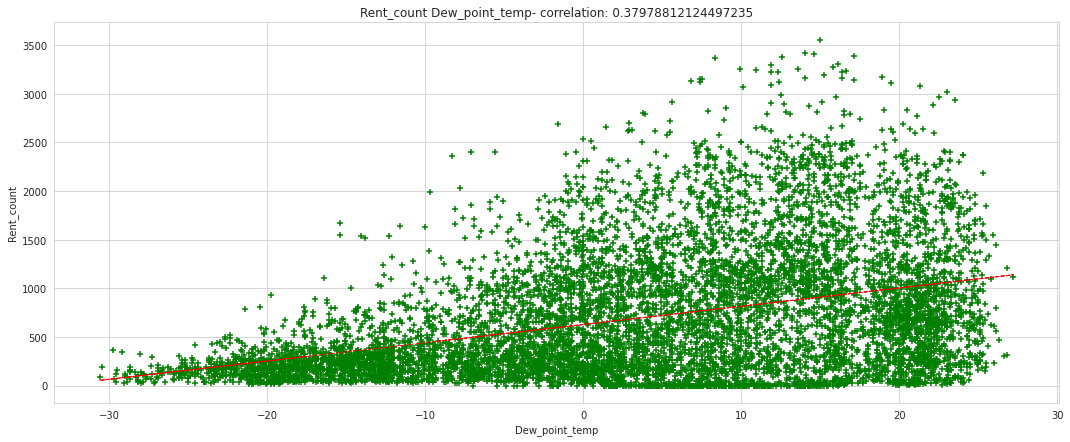

****************************************************************************************************
SOLAR_RADIATION
****************************************************************************************************


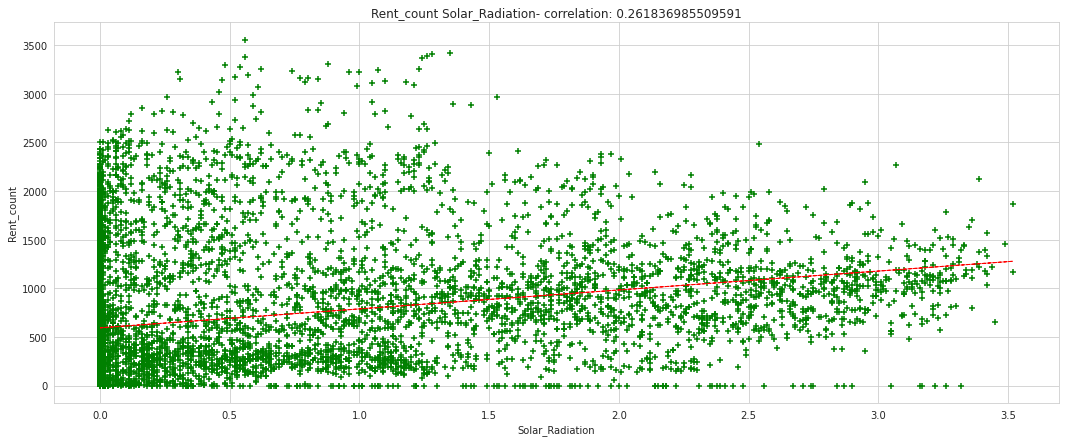

****************************************************************************************************
RAINFALL
****************************************************************************************************


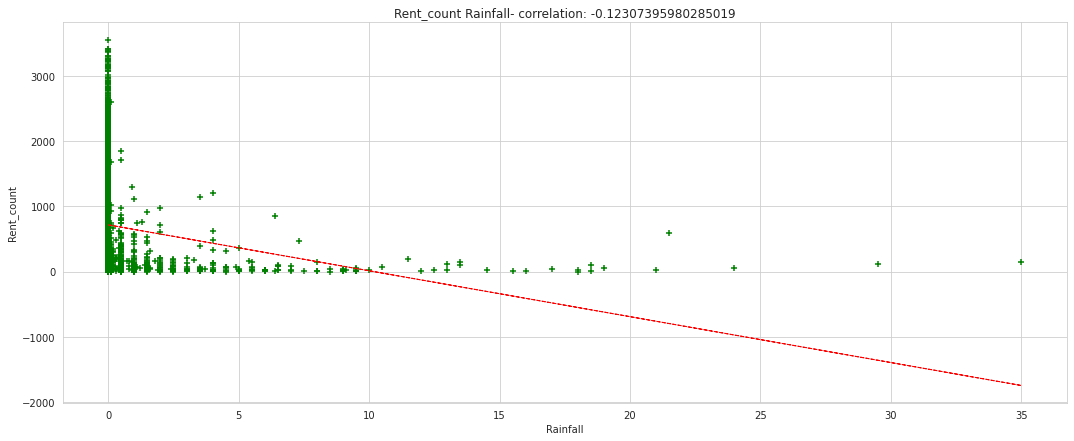

****************************************************************************************************
SNOWFALL
****************************************************************************************************


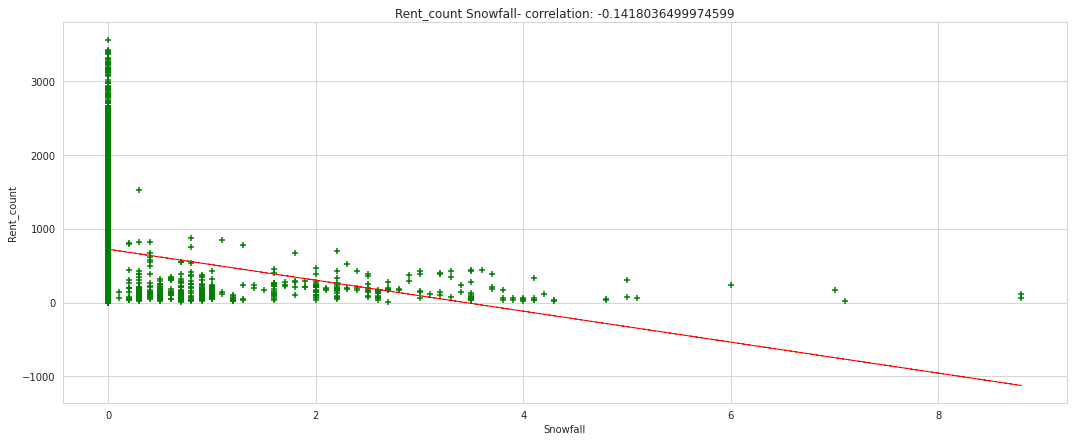

****************************************************************************************************
YEAR
****************************************************************************************************


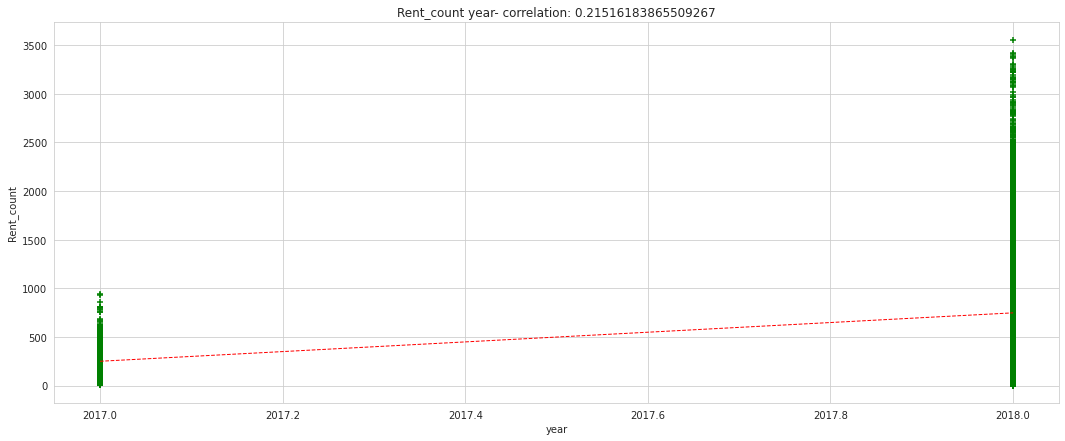

****************************************************************************************************
MONTH
****************************************************************************************************


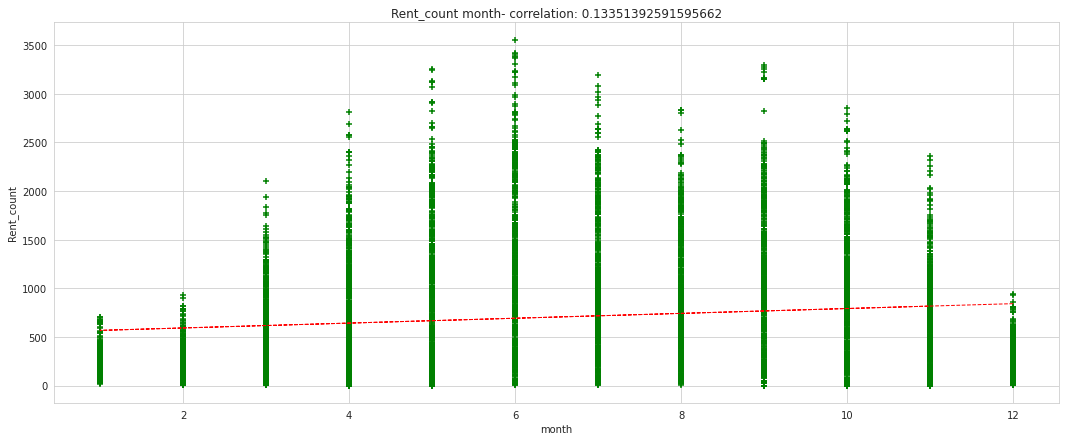

****************************************************************************************************
DAY
****************************************************************************************************


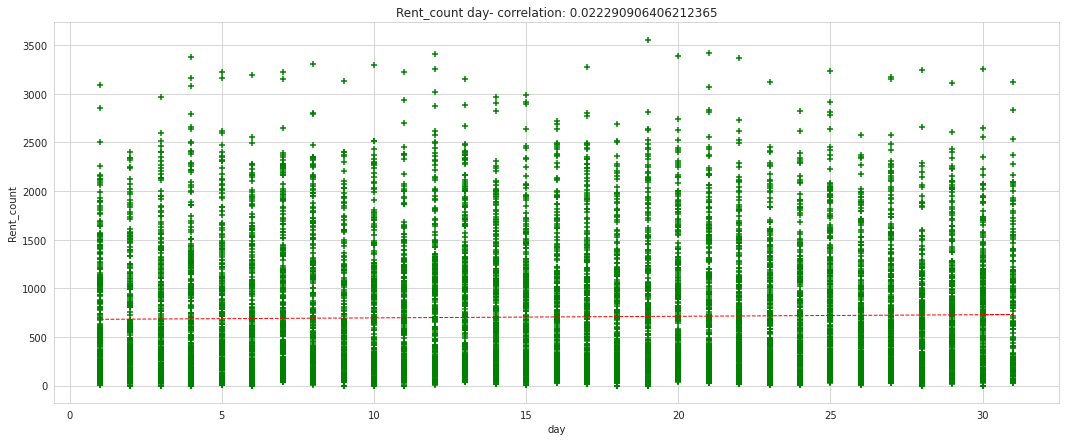

In [148]:
for column in numerical_columns:
  print(str('*'*100))
  print(f'{str(column).upper()}')
  print(str('*'*100))
  fig = plt.figure(figsize=(18, 7))
  ax = fig.gca()
  feature = df[column]
  label = df['Rent_count']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label,color='green',marker='+')
  plt.xlabel(column)
  plt.ylabel('Rent_count')
  ax.set_title('Rent_count ' + column + '- correlation: ' + str(correlation))
  # drawing the linear line
  z = np.polyfit(df[column], df['Rent_count'], 1)
  y_hat = np.poly1d(z)(df[column])
  plt.plot(df[column], y_hat, "r--", lw=1)
  plt.show()

Observation:


1.   
From the above regression plot of all numerical features we see that the columns 'Temperature', 'Wind_speed','Visibility', 'Dew_point_temperature', 'Solar_Radiation' are positively relation to the target variable.

2.  
which means the rented bike count increases with increase of these features.






3.  'Rainfall','Snowfall','Humidity' these features are negatively related with the target variaable which means the rented bike count decreases when these features increse.


# **b) Normalizing the dependent varibale:**
The data normalization (also referred to as data pre-processing) is a basic element of data mining. It means transforming the data, namely converting the source data in to another format that allows processing data effectively. The main purpose of data normalization is to minimize or even exclude duplicated data



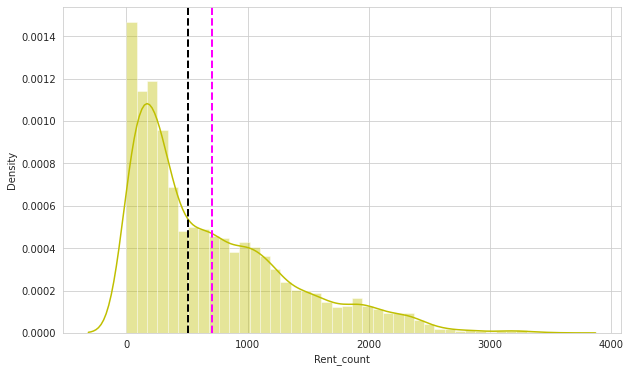

In [149]:
#Distribution plot of Rented Bike Count
plt.figure(figsize=(10,6))
plt.xlabel('Rent_count')
plt.ylabel('Density')
ax=sns.distplot(df['Rent_count'],hist=True ,color="y")
ax.axvline(df['Rent_count'].mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(df['Rent_count'].median(), color='black', linestyle='dashed', linewidth=2)
plt.show()

**The above graph shows that Rented Bike Count has moderate right skewness. Since the assumption of linear regression is that 'the distribution of dependent variable has to be normal', so we should perform some operation to make it normal.**

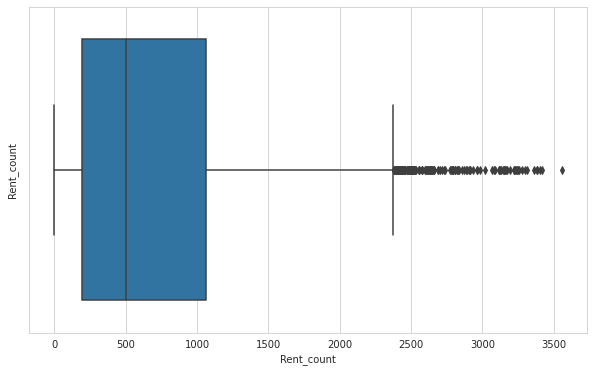

In [150]:
#Boxplot of Rented Bike Count to check outliers
plt.figure(figsize=(10,6))
plt.ylabel('Rent_count')
sns.boxplot(x=df['Rent_count'])

**The above boxplot shows that we have detect outliers in Rented Bike Count column**

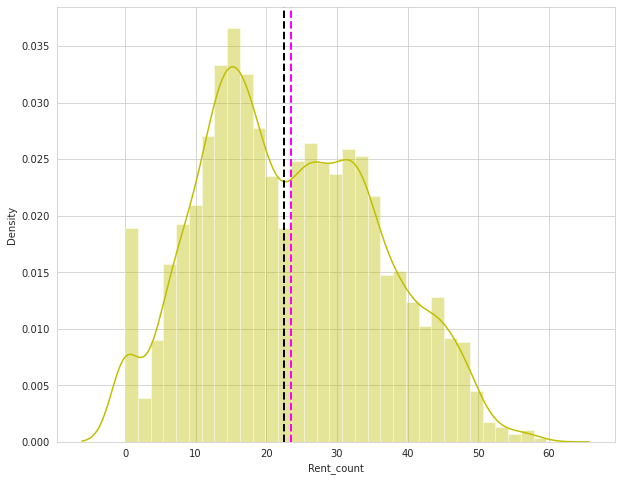

In [151]:
#Applying square root to Rented Bike Count to improve skewness
plt.figure(figsize=(10,8))
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

ax=sns.distplot(np.sqrt(df['Rent_count']), color="y")
ax.axvline(np.sqrt(df['Rent_count']).mean(), color='magenta', linestyle='dashed', linewidth=2)
ax.axvline(np.sqrt(df['Rent_count']).median(), color='black', linestyle='dashed', linewidth=2)

plt.show()

Since we have generic rule of applying Square root for the skewed variable in order to make it normal .After applying Square root to the skewed Rented Bike Count, here we get almost normal distribution.

# **c)plot a bar plot for each numerical feature count with Dist Plot**

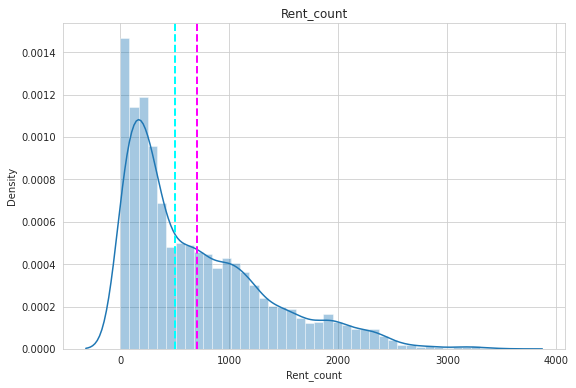

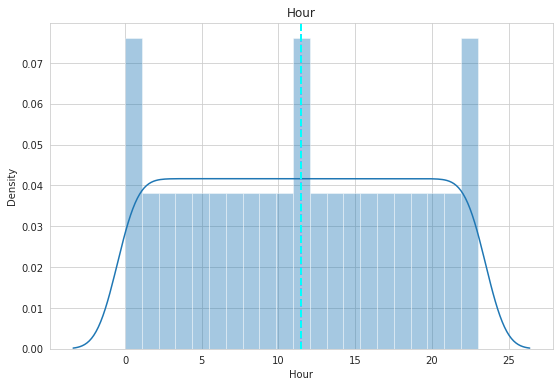

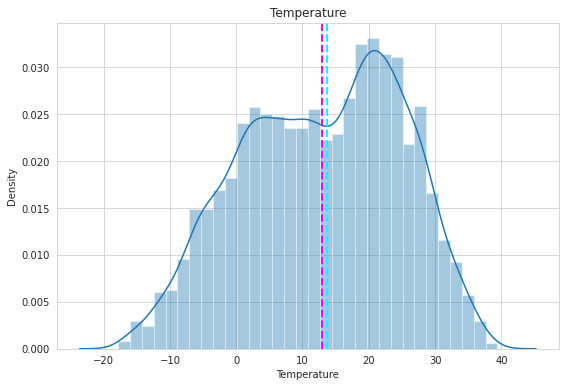

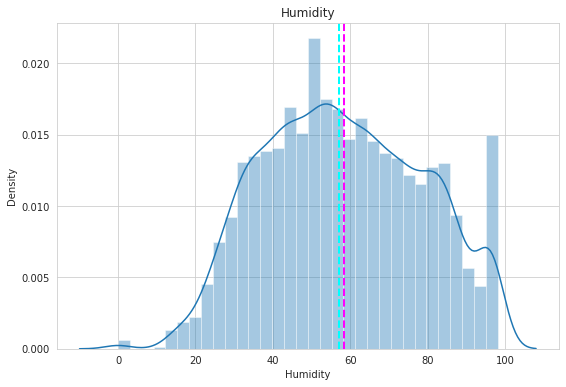

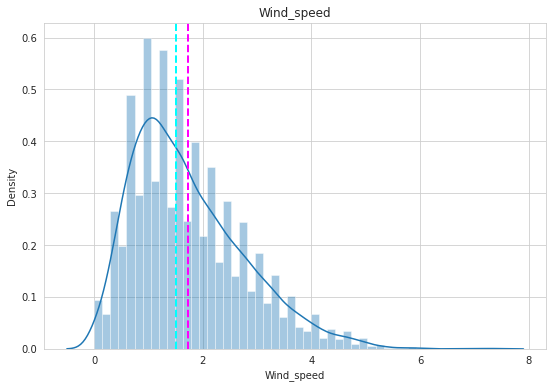

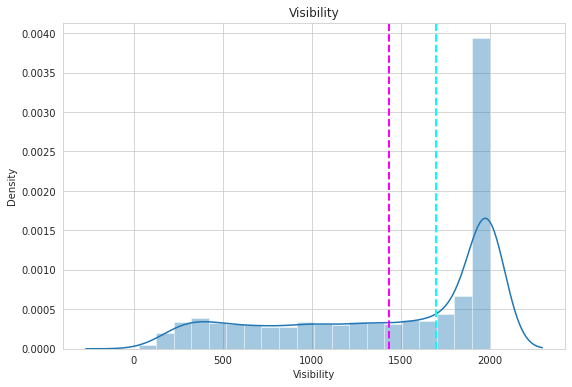

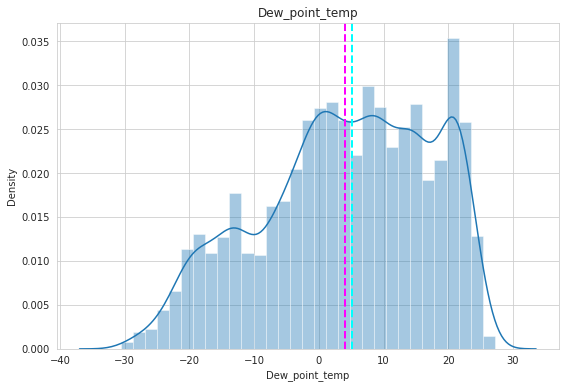

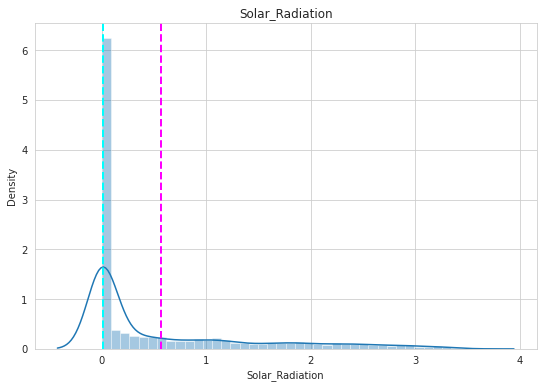

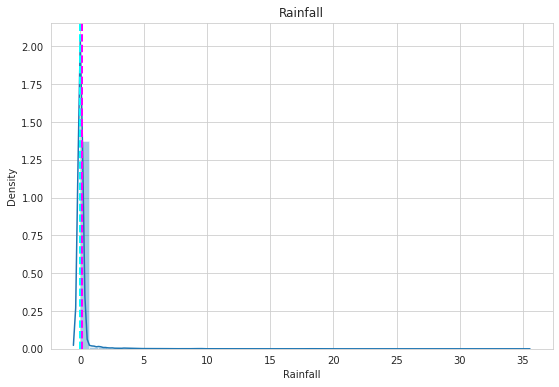

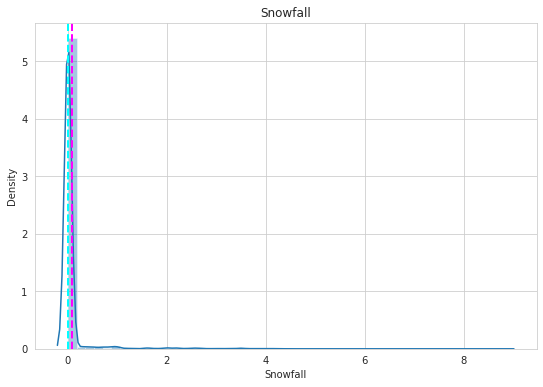

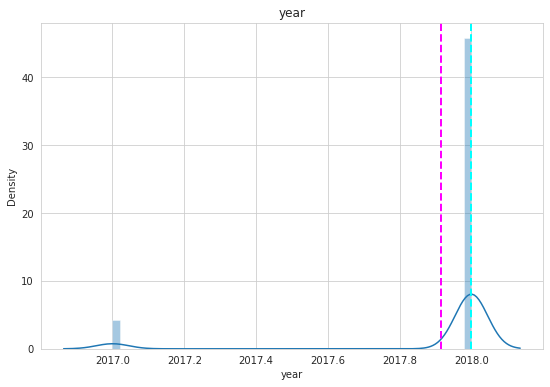

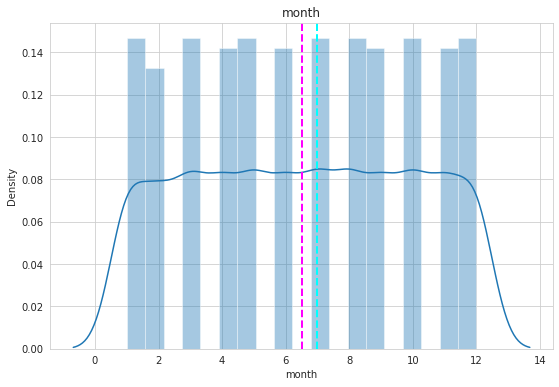

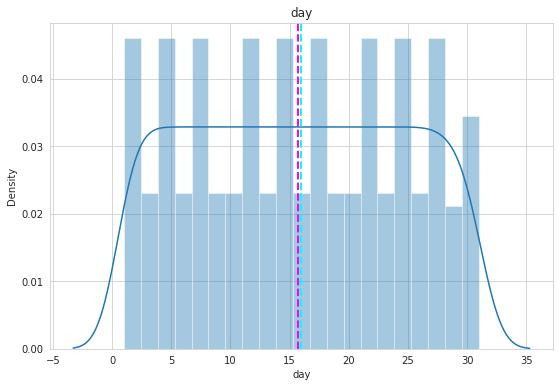

In [152]:
#plot a bar plot for each numerical feature count with Dist Plot (except Car_ID)
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.distplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

# **D)Find & Remove Outlier:**
Linear regression assumes that your independent and dependent variables are not noisy. Consider using data cleaning operations that let you better expose and clarify the signal in your data. This is most important for the output variable and you want to remove outliers in the output variable (y) if possible.

Rent_count            AxesSubplot(0.125,0.657941;0.133621x0.222059)
Hour               AxesSubplot(0.285345,0.657941;0.133621x0.222059)
Temperature         AxesSubplot(0.44569,0.657941;0.133621x0.222059)
Humidity           AxesSubplot(0.606034,0.657941;0.133621x0.222059)
Wind_speed         AxesSubplot(0.766379,0.657941;0.133621x0.222059)
Visibility            AxesSubplot(0.125,0.391471;0.133621x0.222059)
Dew_point_temp     AxesSubplot(0.285345,0.391471;0.133621x0.222059)
Solar_Radiation     AxesSubplot(0.44569,0.391471;0.133621x0.222059)
Rainfall           AxesSubplot(0.606034,0.391471;0.133621x0.222059)
Snowfall           AxesSubplot(0.766379,0.391471;0.133621x0.222059)
year                     AxesSubplot(0.125,0.125;0.133621x0.222059)
month                 AxesSubplot(0.285345,0.125;0.133621x0.222059)
day                    AxesSubplot(0.44569,0.125;0.133621x0.222059)
dtype: object

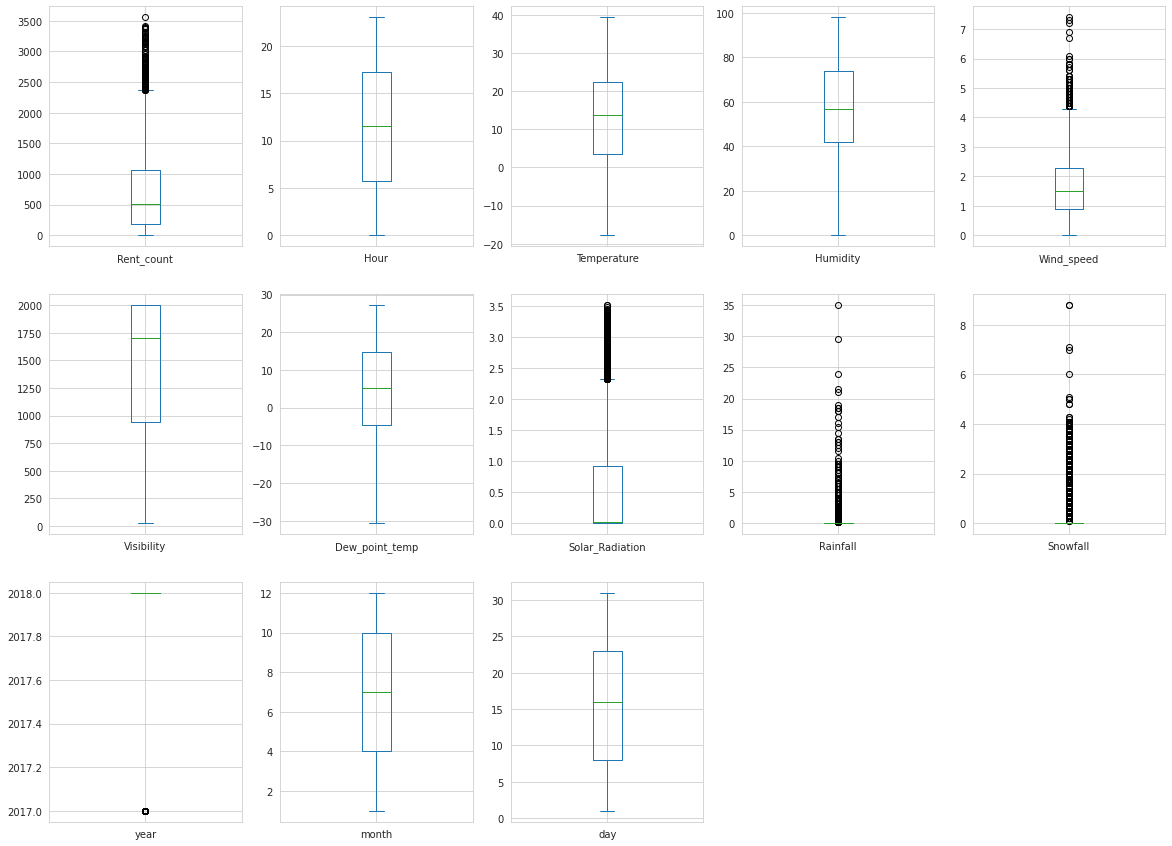

In [153]:
# # plot a boxplot for the label by each numerical feature  
# for col in numerical_features[1:-3]:
#     print(str('*'*100))
#     print(f'{str(col).upper()}')
#     print(str('*'*100))
#     fig = plt.figure(figsize=(18, 7))
#     ax = fig.gca()
#     df.boxplot(col)
#     ax.set_title('Label by ' + col)
#     plt.show()
# # to have all box plots in the same viz
df.plot(kind="box",subplots=True,layout=(3,5) , figsize=(20,15))

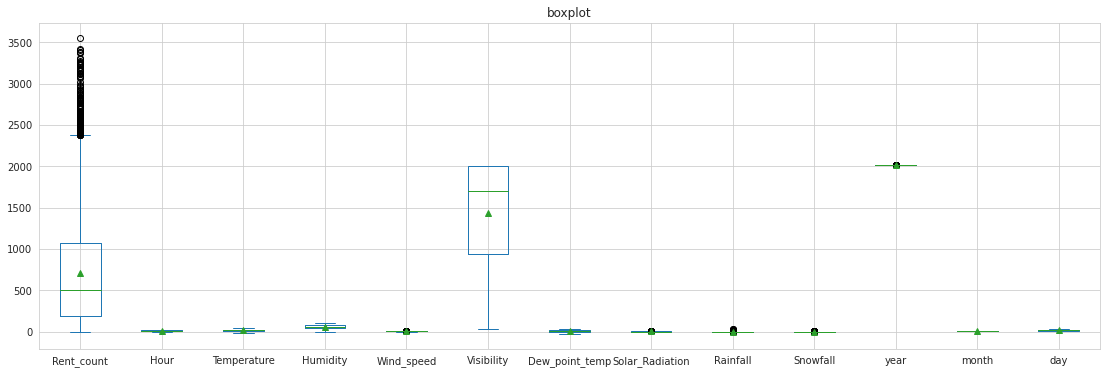

In [154]:
plt.rcParams['figure.figsize']=(19,6)
ax = df[['Rent_count', 'Hour', 'Temperature', 'Humidity', 'Wind_speed',
       'Visibility', 'Dew_point_temp', 'Solar_Radiation', 'Rainfall',
       'Snowfall', 'Seasons', 'Holiday', 'Functioning Day', 'year', 'month',
       'day']].plot(kind='box', title='boxplot', showmeans=True)

plt.show()


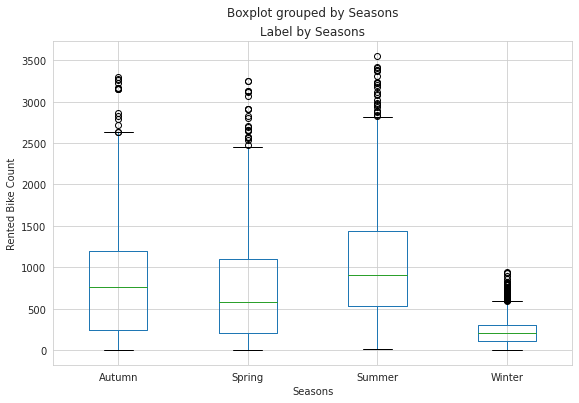

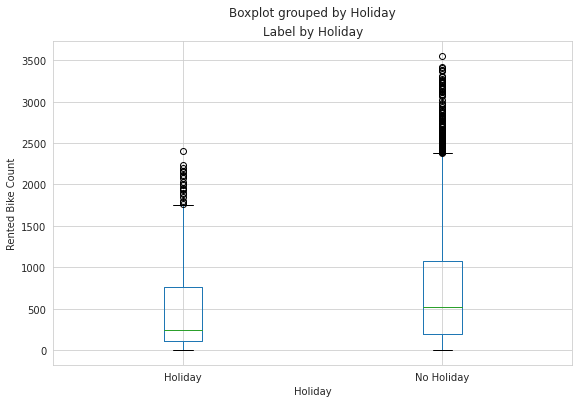

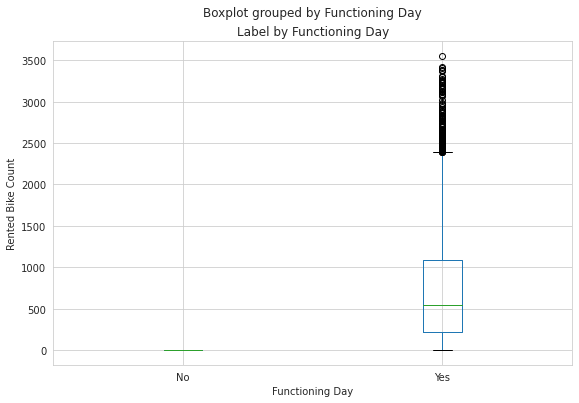

In [155]:
# plot a boxplot for the label by each categorical feature  

for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(column = 'Rent_count', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Rented Bike Count")
plt.show()


# **E) Encoding all the feature**
A dataset may contain various type of values, sometimes it consists of categorical values. So, in-order to use those categorical value for programming efficiently we create dummy variables or OneHotEncoding or LabelEncoder.

A Labelencoder allows the representation of categorical data to be more expressive. Many machine learning algorithms cannot work with categorical data directly. The categories must be converted into numbers. This is required for both input and output variables that are categorical.

In [156]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df['Holiday']= le.fit_transform(df['Holiday']) 
df['Functioning Day']= le.fit_transform(df['Functioning Day'])
df['Seasons']= le.fit_transform(df['Seasons'])

In [157]:
df.drop(['year','month','day'], axis = 1,inplace=True) 

In [158]:
df.head()

Date  Rent_count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0 2017-12-01         254     0         -5.2        37         2.2        2000   
1 2017-12-01         204     1         -5.5        38         0.8        2000   
2 2017-12-01         173     2         -6.0        39         1.0        2000   
3 2017-12-01         107     3         -6.2        40         0.9        2000   
4 2017-12-01          78     4         -6.0        36         2.3        2000   

   Dew_point_temp  Solar_Radiation  Rainfall  Snowfall  Seasons  Holiday  \
0           -17.6              0.0       0.0       0.0        3        1   
1           -17.6              0.0       0.0       0.0        3        1   
2           -17.7              0.0       0.0       0.0        3        1   
3           -17.6              0.0       0.0       0.0        3        1   
4           -18.6              0.0       0.0       0.0        3        1   

   Functioning Day  
0                1  
1                1  
2                1  
3                1  
4                1

# **f) Remove Collinearity (Multicollinearity):**




1.   
Linear regression will over-fit your data when we have highly correlated input variables. Consider calculating pairwise correlations for our input data and removing the most correlated.





2.   Variance inflation factor(VIF) detects multicollinearity.

      **VIF=1/1-R2**



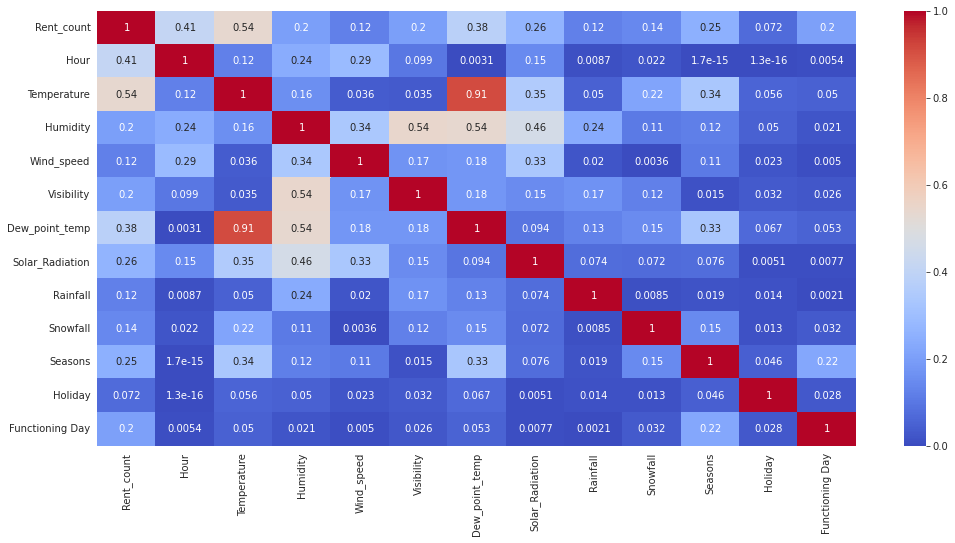

In [159]:
#ploting a hit map to know the Correlation:
plt.figure(figsize=(17,8))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [160]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [161]:
df['Date'] = df['Date'].values.astype(float)

In [162]:
X = df.iloc[:,:-1]
calc_vif(X)

variables         VIF
0              Date  423.259188
1        Rent_count    1.004418
2              Hour    0.999902
3       Temperature    1.007455
4          Humidity    1.005537
5        Wind_speed    0.996699
6        Visibility    1.002836
7    Dew_point_temp    1.002105
8   Solar_Radiation    1.000696
9          Rainfall    1.000059
10         Snowfall    0.999719
11          Seasons    0.987779
12          Holiday    1.002779

In [163]:
# Decide to drop Date column as VIF value is very high
df.drop(['Date'], axis = 1,inplace=True) 

In [164]:
X = df.iloc[:,:-1]
calc_vif(X)

variables        VIF
0        Rent_count   4.236172
1              Hour   5.061977
2       Temperature  43.778009
3          Humidity  15.263524
4        Wind_speed   4.848585
5        Visibility   9.140026
6    Dew_point_temp  23.144842
7   Solar_Radiation   2.918672
8          Rainfall   1.105388
9          Snowfall   1.128549
10          Seasons   3.215753
11          Holiday  19.681768

In [165]:
# Decided to drop temperature column due to high multicollinearity
df.drop(['Temperature'], axis = 1,inplace=True) 

In [166]:
X = df.iloc[:,:-1]
calc_vif(X)

variables        VIF
0        Rent_count   3.984624
1              Hour   4.866753
2          Humidity  13.077266
3        Wind_speed   4.805818
4        Visibility   6.373789
5    Dew_point_temp   2.514901
6   Solar_Radiation   2.087096
7          Rainfall   1.105183
8          Snowfall   1.118263
9           Seasons   3.150477
10          Holiday  16.783325

In [167]:
df.drop(['Humidity'], axis = 1,inplace=True)

In [168]:
X = df.iloc[:,:-1]
calc_vif(X)

variables       VIF
0       Rent_count  3.753108
1             Hour  4.826967
2       Wind_speed  4.705428
3       Visibility  6.372967
4   Dew_point_temp  1.571181
5  Solar_Radiation  1.731223
6         Rainfall  1.094009
7         Snowfall  1.087005
8          Seasons  3.015929
9          Holiday  8.186150

# **G) Distribution of columns (Normal distribution) :**

In [169]:
skw_siz = df.skew().sort_values(ascending=False)
skw_siz

Rainfall           14.533232
Snowfall            8.440801
Solar_Radiation     1.504040
Rent_count          1.153428
Wind_speed          0.890955
Seasons             0.004382
Hour                0.000000
Dew_point_temp     -0.367298
Visibility         -0.701786
Holiday            -4.163603
Functioning Day    -5.170969
dtype: float64

In [170]:
top_skew = skw_siz[:4]
top_skew

Rainfall           14.533232
Snowfall            8.440801
Solar_Radiation     1.504040
Rent_count          1.153428
dtype: float64

In [171]:
top_sked_col = df.loc[:,['Rainfall','Snowfall']]

before treating  14.533232242546704


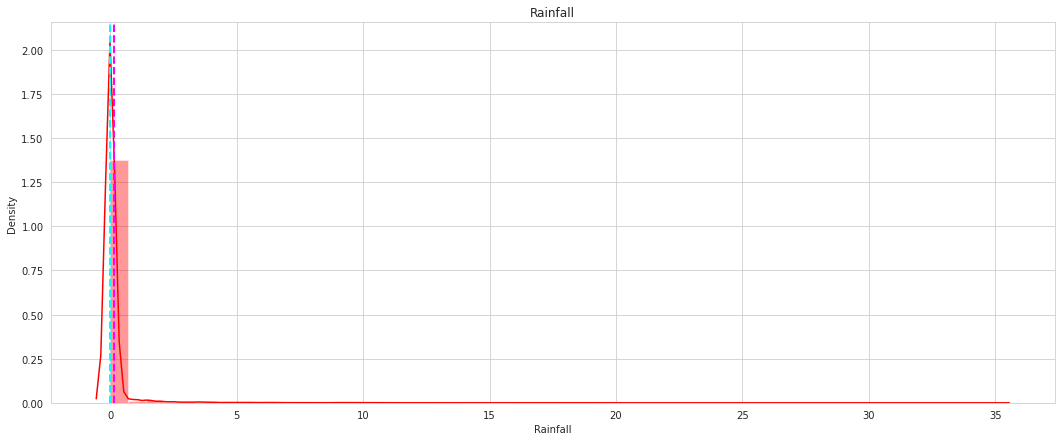

before treating  8.440800781484777


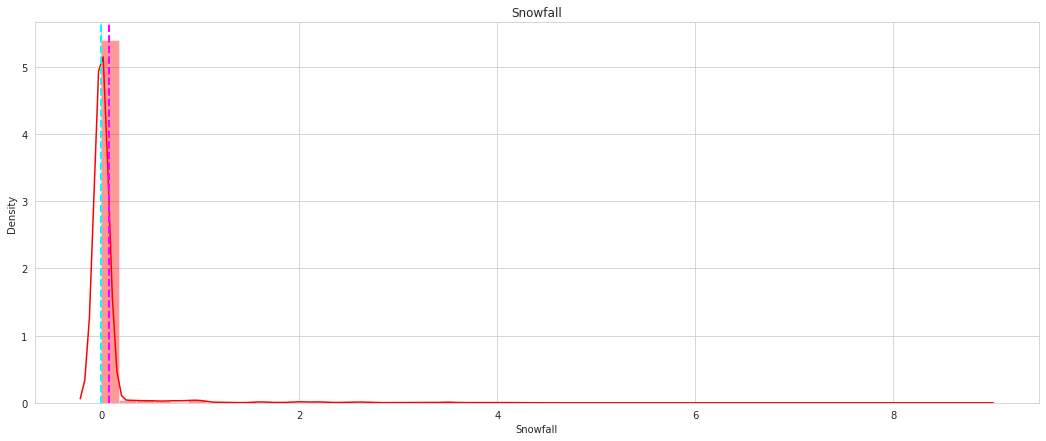

In [172]:
#plot a bar plot for each numerical feature count with Dist Plot
for col in top_sked_col:
  fig=plt.figure(figsize=(18, 7))
  ax=fig.gca()
  feature= (df[col])
  print("before treating ",df[col].skew())
  sns.distplot(df[col],color="r")
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()

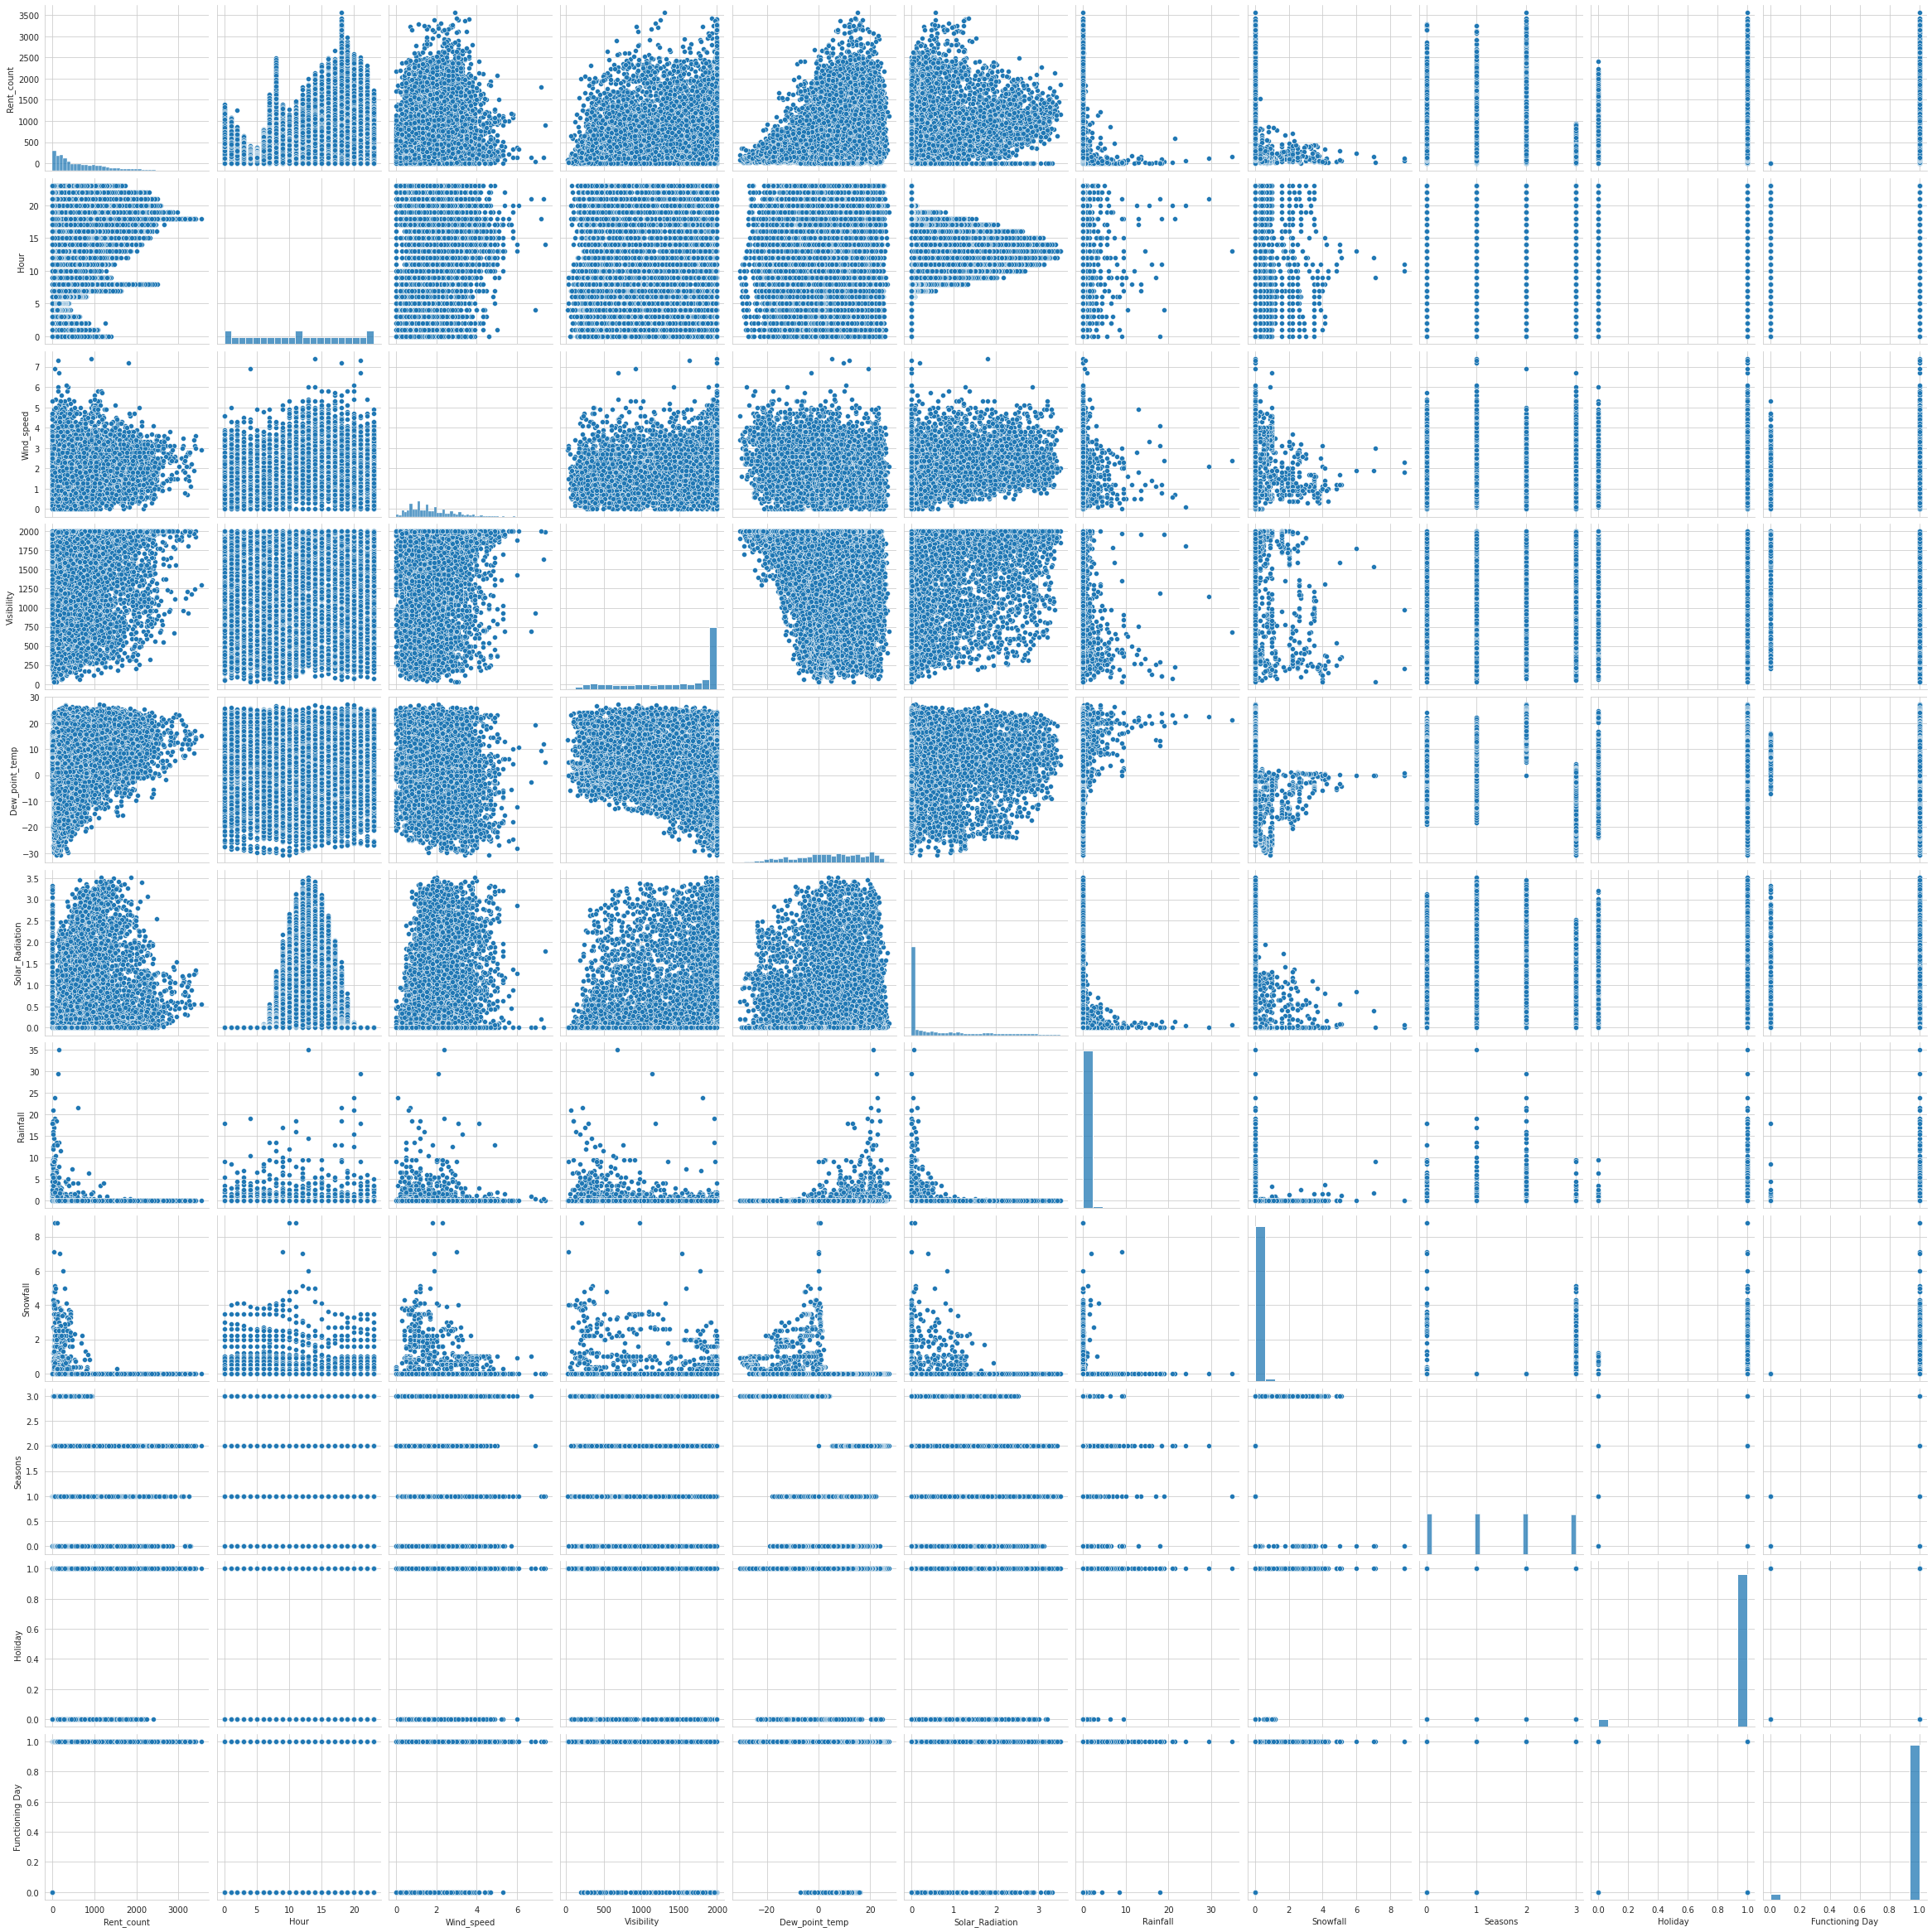

In [66]:

sns.pairplot(df, size=3)


# **MACHINE LEARNING MODEL IMPLEMENTATION**

---



---
**TRAIN TEST SPLIT:**

Before, fitting any model it is a rule of thumb to split the dataset into a training and test set. This means some proportions of the data will go into training the model and some portion will be used to evaluate how our model is performing on any unseen data. The proportions may vary from 60:40, 70:30, 75:25 depending on the person but mostly used is 80:20 for training and testing respectively. In this step we will split our data into training and testing set using scikit learn library.


In [67]:
df.head()

Rent_count  Hour  Wind_speed  Visibility  Dew_point_temp  Solar_Radiation  \
0         254     0         2.2        2000           -17.6              0.0   
1         204     1         0.8        2000           -17.6              0.0   
2         173     2         1.0        2000           -17.7              0.0   
3         107     3         0.9        2000           -17.6              0.0   
4          78     4         2.3        2000           -18.6              0.0   

   Rainfall  Snowfall  Seasons  Holiday  Functioning Day  
0       0.0       0.0        3        1                1  
1       0.0       0.0        3        1                1  
2       0.0       0.0        3        1                1  
3       0.0       0.0        3        1                1  
4       0.0       0.0        3        1                1

In [68]:
X = df[['Hour','Wind_speed','Visibility','Dew_point_temp','Solar_Radiation','Rainfall','Snowfall','Seasons','Holiday','Functioning Day']]
y = np.sqrt(df['Rent_count'])

In [69]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0)
print(f'the shape of X : {X.shape}')
print(f'the shape of y :{y.shape}') 
print(f'the shape of X_train : {X_train.shape}')
print(f'the shape of y_train : {X_test.shape}')

the shape of X : (8760, 10)
the shape of y :(8760,)
the shape of X_train : (7008, 10)
the shape of y_train : (1752, 10)


# **1) LINEAR REGRESSION.**

In [70]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.5841833427090142

In [71]:
# coffecient of our linear equation (slope)
reg.coef_

array([ 6.09742266e-01,  1.43521498e-01,  3.89449085e-03,  3.43943957e-01,
        2.26328875e+00, -1.85144385e+00, -1.35081134e+00, -2.13530496e+00,
        2.83622814e+00,  2.87442647e+01])

In [72]:
#get the X_train and X-test value
y_pred_train=reg.predict(X_train)
y_pred_test=reg.predict(X_test)


In [73]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error((y_train), (y_pred_train))
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_train, y_pred_train)
print("MAE :",MAE_lr)



#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score(y_train, y_pred_train)
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 63.53970367332495
RMSE : 7.971179565994292
MAE : 6.090480301800645
R2 : 0.588295094528132
Adjusted R2 : 0.5859303334398387



Looks like our r2 score value is 0.58 that means our model is able to capture 58% of the data variance. Lets save it in a dataframe for later comparisons

In [74]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
training_df=pd.DataFrame(dict1,index=[1])

In [75]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_lr= mean_squared_error(y_test, y_pred_test)
print("MSE :",MSE_lr)

#calculate RMSE
RMSE_lr=np.sqrt(MSE_lr)
print("RMSE :",RMSE_lr)


#calculate MAE
MAE_lr= mean_absolute_error(y_test, y_pred_test)
print("MAE :",MAE_lr)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_lr= r2_score((y_test), (y_pred_test))
print("R2 :",r2_lr)
Adjusted_R2_lr = (1-(1-r2_score((y_test), (y_pred_test)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",Adjusted_R2_lr )

MSE : 65.48540902879017
RMSE : 8.092305544700482
MAE : 6.176862942162509
R2 : 0.5841833427090142
Adjusted R2 : 0.5817949644362342


The r2_score for the test set is 0.58. This means our linear model is not performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [76]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Linear regression ',
       'MAE':round((MAE_lr),3),
       'MSE':round((MSE_lr),3),
       'RMSE':round((RMSE_lr),3),
       'R2_score':round((r2_lr),3),
       'Adjusted R2':round((Adjusted_R2_lr ),2)
       }
test_df=pd.DataFrame(dict2,index=[1])

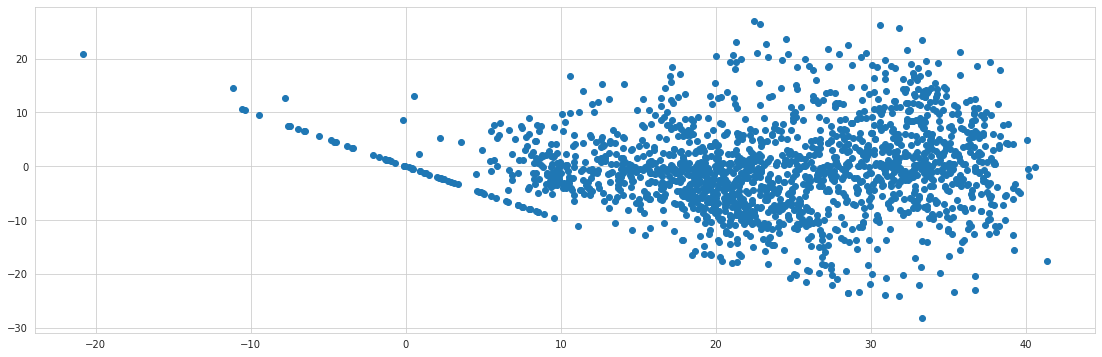

In [77]:
### Heteroscadacity
plt.scatter((y_pred_test),(y_test)-(y_pred_test))

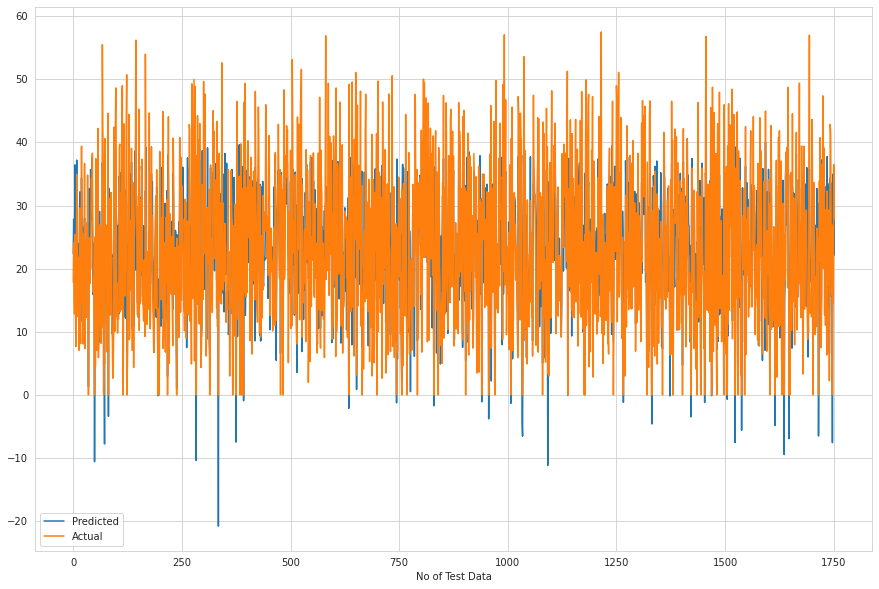

In [78]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(y_pred_test)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.show()

# **2)LASSO REGRESSION**

In [79]:
# Create an instance of Lasso Regression implementation
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0, max_iter=3000)
# Fit the Lasso model
lasso.fit(X_train, y_train)
# Create the model score
print(lasso.score(X_test, y_test), lasso.score(X_train, y_train))

0.36272117200066434 0.4052905837781736


In [80]:
#get the X_train and X-test value
y_pred_train_lasso=lasso.predict(X_train)
y_pred_test_lasso=lasso.predict(X_test)

In [81]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error((y_train), (y_pred_train_lasso))
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_train, y_pred_train_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score(y_train, y_pred_train_lasso)
print("R2 :",r2_l)
Adjusted_R2_l = (1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 91.78336127708093
RMSE : 9.580363316549166
MAE : 7.260601220951637
R2 : 0.4052905837781736
Adjusted R2 : 0.40187467673496957


Looks like our r2 score value is 0.40 that means our model is not able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [82]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2)
       }
training_df=training_df.append(dict1,ignore_index=True)

In [83]:
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_l= mean_squared_error(y_test, y_pred_test_lasso)
print("MSE :",MSE_l)

#calculate RMSE
RMSE_l=np.sqrt(MSE_l)
print("RMSE :",RMSE_l)


#calculate MAE
MAE_l= mean_absolute_error(y_test, y_pred_test_lasso)
print("MAE :",MAE_l)


from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_l= r2_score((y_test), (y_pred_test_lasso))
print("R2 :",r2_l)
Adjusted_R2_l=(1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 100.36265740003871
RMSE : 10.018116459696339
MAE : 7.571432363869566
R2 : 0.36272117200066434
Adjusted R2 : 0.35906075368935275


The r2_score for the test set is 0.36. This means our linear model is not performing well on the data. Let us try to visualize our residuals and see if there is heteroscedasticity(unequal variance or scatter).

In [84]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Lasso regression ',
       'MAE':round((MAE_l),3),
       'MSE':round((MSE_l),3),
       'RMSE':round((RMSE_l),3),
       'R2_score':round((r2_l),3),
       'Adjusted R2':round((Adjusted_R2_l ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

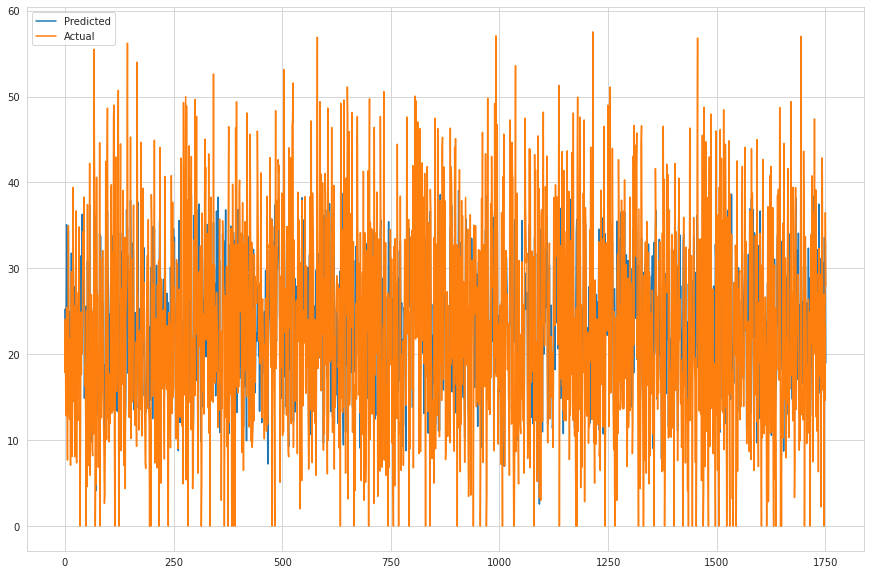

In [85]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_lasso))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

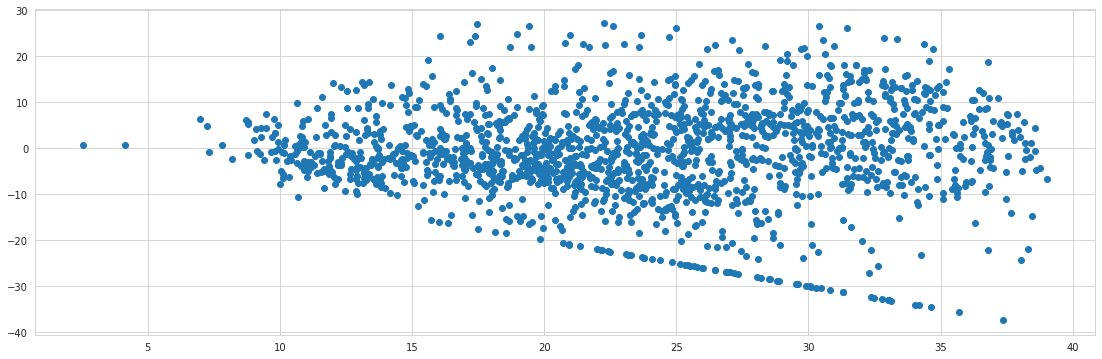

In [86]:
### Heteroscadacity
plt.scatter((y_pred_test_lasso),(y_test-y_pred_test_lasso))


# **2)RIDGE REGRESSION :**

In [87]:
#import the packages
from sklearn.linear_model import Ridge

ridge= Ridge(alpha=0.1)


In [88]:
#FIT THE MODEL
ridge.fit(X_train,y_train)

Ridge(alpha=0.1)

In [89]:

#check the score
ridge.score(X_train, y_train)

0.5882950575366521

In [90]:
#get the X_train and X-test value
y_pred_train_ridge=ridge.predict(X_train)
y_pred_test_ridge=ridge.predict(X_test)

In [91]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_r= mean_squared_error((y_train), (y_pred_train_ridge))
print("MSE :",MSE_r)

#calculate RMSE
RMSE_r=np.sqrt(MSE_r)
print("RMSE :",RMSE_r)


#calculate MAE
MAE_r= mean_absolute_error(y_train, y_pred_train_ridge)
print("MAE :",MAE_r)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_r= r2_score(y_train, y_pred_train_ridge)
print("R2 :",r2_r)
Adjusted_R2_r=(1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 63.53970938233556
RMSE : 7.971179924097534
MAE : 6.090510887344966
R2 : 0.5882950575366521
Adjusted R2 : 0.5859302962358861


Looks like our r2 score value is 0.58 that means our model is able to capture most of the data variance. Lets save it in a dataframe for later comparisons.

In [92]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Ridge regression ',
       'MAE':round((MAE_r),3),
       'MSE':round((MSE_r),3),
       'RMSE':round((RMSE_r),3),
       'R2_score':round((r2_r),3),
       'Adjusted R2':round((Adjusted_R2_r ),2)}
training_df=training_df.append(dict1,ignore_index=True)

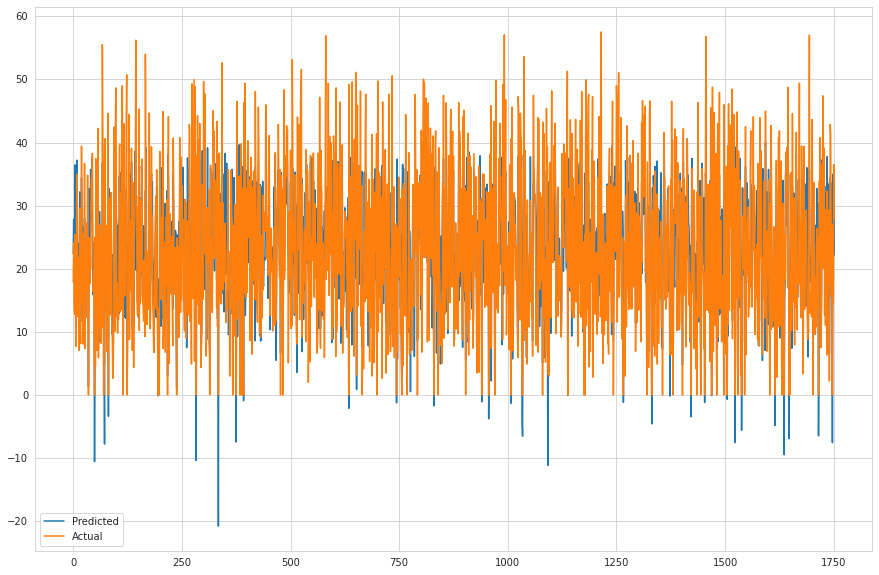

In [93]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((y_pred_test_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

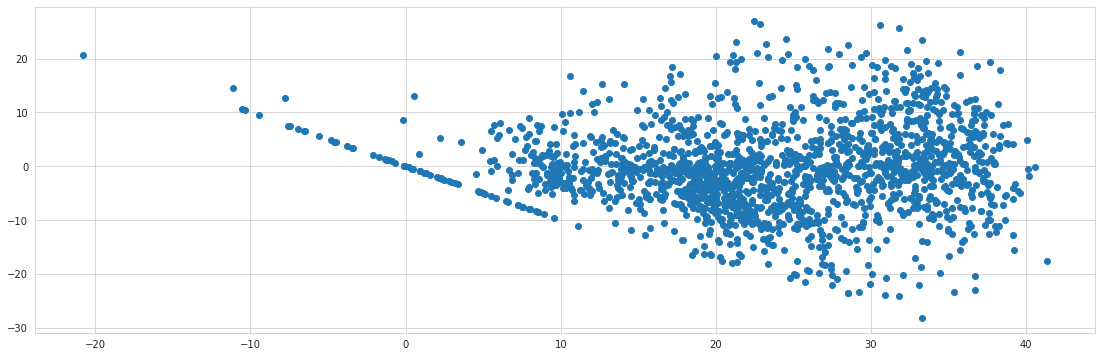

In [94]:

### Heteroscadacity
plt.scatter((y_pred_test_ridge),(y_test)-(y_pred_test_ridge))

# **3)ELASTIC NET REGRESSION**

In [95]:
#import the packages
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [96]:
#FIT THE MODEL
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1)

In [97]:
#check the score
elasticnet.score(X_train, y_train)

0.5190983288807387

In [98]:
#get the X_train and X-test value
y_pred_train_en=elasticnet.predict(X_train)
y_pred_test_en=elasticnet.predict(X_test)

In [99]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error((y_train), (y_pred_train_en))
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_train, y_pred_train_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score(y_train, y_pred_train_en)
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_en))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 74.2190565932243
RMSE : 8.615048264126226
MAE : 6.580474515274741
R2 : 0.5190983288807387
Adjusted R2 : 0.5163361136531726


In [100]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Elastic net regression ',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [101]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_e= mean_squared_error(y_test, y_pred_test_en)
print("MSE :",MSE_e)

#calculate RMSE
RMSE_e=np.sqrt(MSE_e)
print("RMSE :",RMSE_e)


#calculate MAE
MAE_e= mean_absolute_error(y_test, y_pred_test_en)
print("MAE :",MAE_e)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_e= r2_score((y_test), (y_pred_test_en))
print("R2 :",r2_e)
Adjusted_R2_e=(1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 79.251144063564
RMSE : 8.902311164162034
MAE : 6.7935603819766985
R2 : 0.49677422345320355
Adjusted R2 : 0.49388378246212483


In [102]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Elastic net regression Test',
       'MAE':round((MAE_e),3),
       'MSE':round((MSE_e),3),
       'RMSE':round((RMSE_e),3),
       'R2_score':round((r2_e),3),
       'Adjusted R2':round((Adjusted_R2_e ),2)}
test_df=test_df.append(dict2,ignore_index=True)

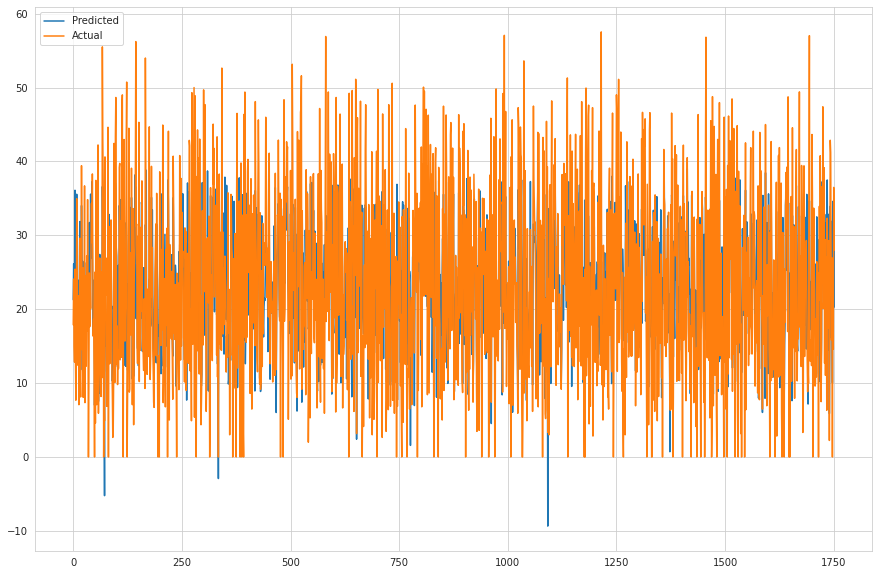

In [103]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot(np.array(y_pred_test_en))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

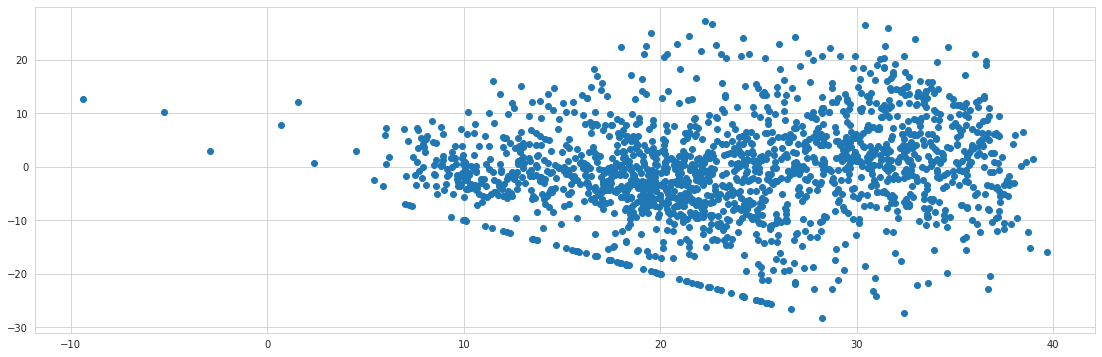

In [104]:
### Heteroscadacity
plt.scatter((y_pred_test_en),(y_test)-(y_pred_test_en))

# **4)DECISION TREE:**

In [105]:
#import the packages
from sklearn.tree import DecisionTreeRegressor
decision_regressor = DecisionTreeRegressor(criterion='mse', max_depth=8,
                      max_features=9, max_leaf_nodes=100,)
decision_regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=8, max_features=9,
                      max_leaf_nodes=100)

In [106]:
#get the X_train and X-test value
y_pred_train_d = decision_regressor.predict(X_train)
y_pred_test_d = decision_regressor.predict(X_test)

In [107]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",decision_regressor.score(X_train,y_train))

#calculate MSE
MSE_d= mean_squared_error(y_train, y_pred_train_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_train, y_pred_train_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score(y_train, y_pred_train_d)
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_d))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8064043842500688
MSE : 29.878215910755138
RMSE : 5.46609695402077
MAE : 3.8132070247300884
R2 : 0.8064043842500688
Adjusted R2 : 0.8052924048373753


In [108]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [109]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_d= mean_squared_error(y_test, y_pred_test_d)
print("MSE :",MSE_d)

#calculate RMSE
RMSE_d=np.sqrt(MSE_d)
print("RMSE :",RMSE_d)


#calculate MAE
MAE_d= mean_absolute_error(y_test, y_pred_test_d)
print("MAE :",MAE_d)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_d= r2_score((y_test), (y_pred_test_d))
print("R2 :",r2_d)
Adjusted_R2_d=(1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_d)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 33.87808712169408
RMSE : 5.820488563831569
MAE : 4.023555227160283
R2 : 0.7848822638312857
Adjusted R2 : 0.7836466651169335


In [110]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Dicision tree regression ',
       'MAE':round((MAE_d),3),
       'MSE':round((MSE_d),3),
       'RMSE':round((RMSE_d),3),
       'R2_score':round((r2_d),3),
       'Adjusted R2':round((Adjusted_R2_d),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

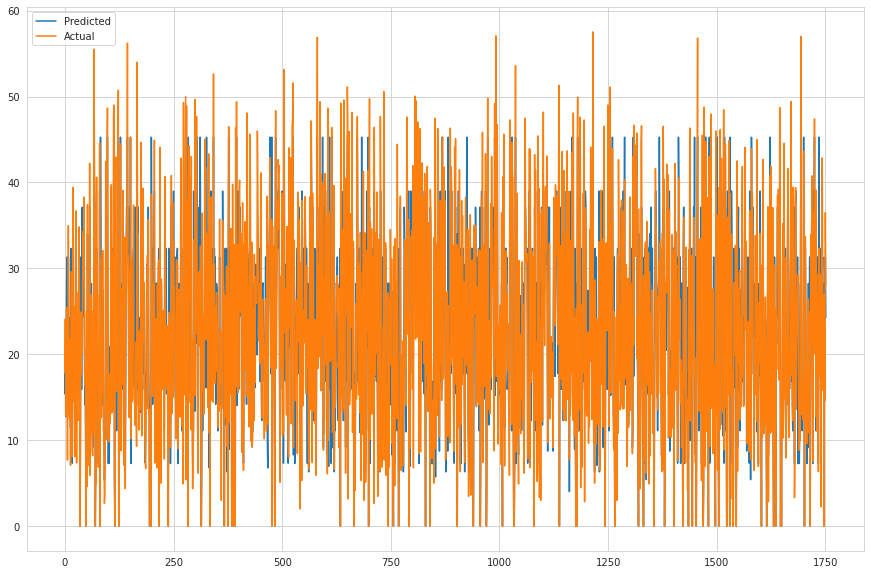

In [111]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_d)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

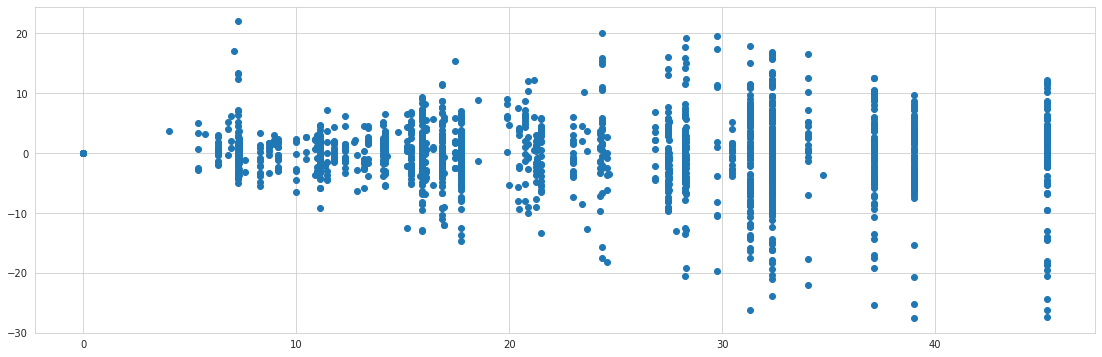

In [112]:
### Heteroscadacity
plt.scatter((y_pred_test_d),(y_test)-(y_pred_test_d))

# **5)RANDOM FOREST:**

In [113]:
#import the packages
from sklearn.ensemble import RandomForestRegressor
# Create an instance of the RandomForestRegressor
rf_model = RandomForestRegressor()

rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [175]:
# Making predictions on train and test data

y_pred_train_r = rf_model.predict(X_train)
y_pred_test_r = rf_model.predict(X_test)

In [176]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",rf_model.score(X_train,y_train))

#calculate MSE
MSE_rf= mean_squared_error(y_train, y_pred_train_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_train, y_pred_train_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score(y_train, y_pred_train_r)
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_r))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )


Model Score: 0.9803683800254265
MSE : 3.0298092134269248
RMSE : 1.7406347156790034
MAE : 1.1777871540772542
R2 : 0.9803683800254265
Adjusted R2 : 0.9802556194282147


In [177]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
training_df=training_df.append(dict1,ignore_index=True)

In [178]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_rf= mean_squared_error(y_test, y_pred_test_r)
print("MSE :",MSE_rf)

#calculate RMSE
RMSE_rf=np.sqrt(MSE_rf)
print("RMSE :",RMSE_rf)


#calculate MAE
MAE_rf= mean_absolute_error(y_test, y_pred_test_r)
print("MAE :",MAE_rf)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_rf= r2_score((y_test), (y_pred_test_r))
print("R2 :",r2_rf)
Adjusted_R2_rf=(1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 21.196857019051404
RMSE : 4.60400445471672
MAE : 3.08399517935413
R2 : 0.8654050366111035
Adjusted R2 : 0.8646319466433326


In [179]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Random forest regression ',
       'MAE':round((MAE_rf),3),
       'MSE':round((MSE_rf),3),
       'RMSE':round((RMSE_rf),3),
       'R2_score':round((r2_rf),3),
       'Adjusted R2':round((Adjusted_R2_rf ),2)}
test_df=test_df.append(dict2,ignore_index=True)

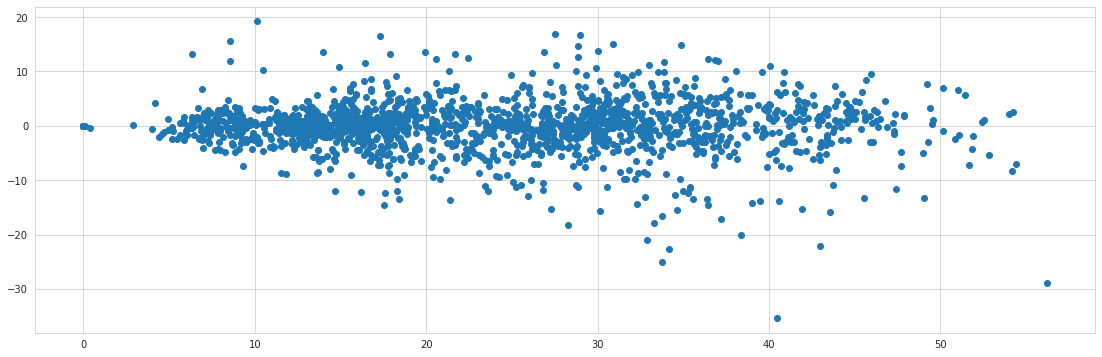

In [180]:
### Heteroscadacity
plt.scatter((y_pred_test_r),(y_test)-(y_pred_test_r))

In [181]:
rf_model.feature_importances_

array([0.30194883, 0.02785666, 0.05214496, 0.08991744, 0.04575002,
       0.11785069, 0.00337914, 0.20245231, 0.00441809, 0.15428187])

In [182]:
importances = rf_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [183]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [184]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)


Feature  Feature Importance
0             Hour                0.30
7          Seasons                0.20
9  Functioning Day                0.15
5         Rainfall                0.12
3   Dew_point_temp                0.09
2       Visibility                0.05
4  Solar_Radiation                0.05
1       Wind_speed                0.03
6         Snowfall                0.00
8          Holiday                0.00

In [185]:
#FIT THE MODEL
rf_model.fit(X_train,y_train)

RandomForestRegressor()

In [186]:
features = X_train.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

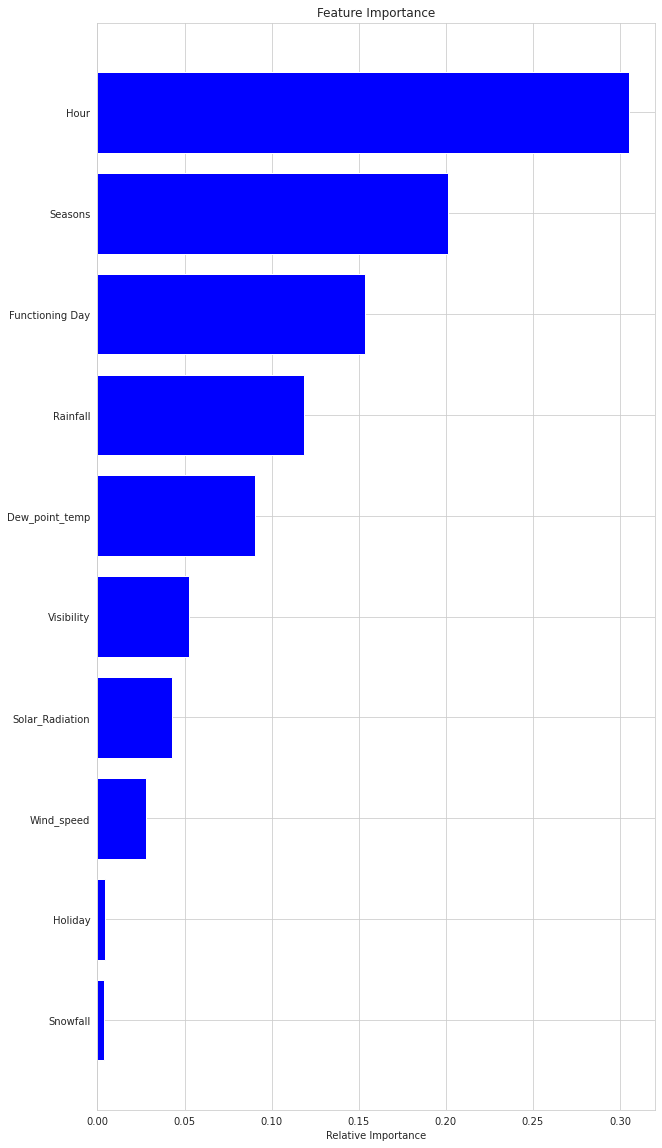

In [187]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **6)GRADIENT BOOSTING**

In [188]:
#import the packages
from sklearn.ensemble import GradientBoostingRegressor
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()


gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [189]:
# Making predictions on train and test data

y_pred_train_g = gb_model.predict(X_train)
y_pred_test_g = gb_model.predict(X_test)

In [190]:
#import the packages
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_model.score(X_train,y_train))
#calculate MSE
MSE_gb= mean_squared_error(y_train, y_pred_train_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_train, y_pred_train_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score(y_train, y_pred_train_g)
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.8479069348445036
MSE : 23.472997679422324
RMSE : 4.844893980204554
MAE : 3.499138452562752
R2 : 0.8479069348445036
Adjusted R2 : 0.8470333388355691


In [191]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
training_df=training_df.append(dict1,ignore_index=True)

In [192]:
#import the packages
from sklearn.metrics import mean_squared_error
#calculate MSE
MSE_gb= mean_squared_error(y_test, y_pred_test_g)
print("MSE :",MSE_gb)

#calculate RMSE
RMSE_gb=np.sqrt(MSE_gb)
print("RMSE :",RMSE_gb)


#calculate MAE
MAE_gb= mean_absolute_error(y_test, y_pred_test_g)
print("MAE :",MAE_gb)


#import the packages
from sklearn.metrics import r2_score
#calculate r2 and adjusted r2
r2_gb= r2_score((y_test), (y_pred_test_g))
print("R2 :",r2_gb)
Adjusted_R2_gb = (1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_test_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 26.010017897694116
RMSE : 5.100001754675592
MAE : 3.648176345545326
R2 : 0.8348426182457993
Adjusted R2 : 0.8338939830835121


In [193]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient boosting regression ',
       'MAE':round((MAE_gb),3),
       'MSE':round((MSE_gb),3),
       'RMSE':round((RMSE_gb),3),
       'R2_score':round((r2_gb),3),
       'Adjusted R2':round((Adjusted_R2_gb ),2),
       }
test_df=test_df.append(dict2,ignore_index=True)

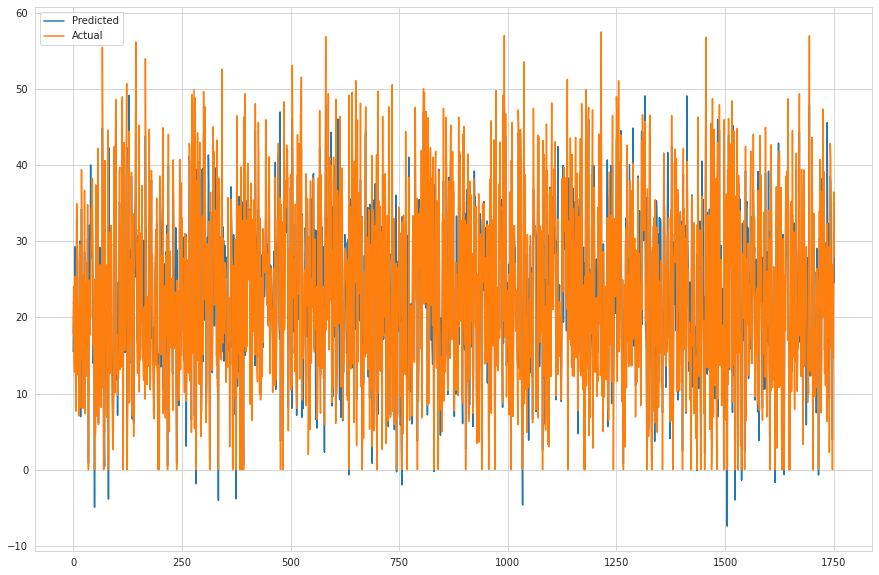

In [194]:
#Plot the figure
plt.figure(figsize=(15,10))
plt.plot((np.array(y_pred_test_g)))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

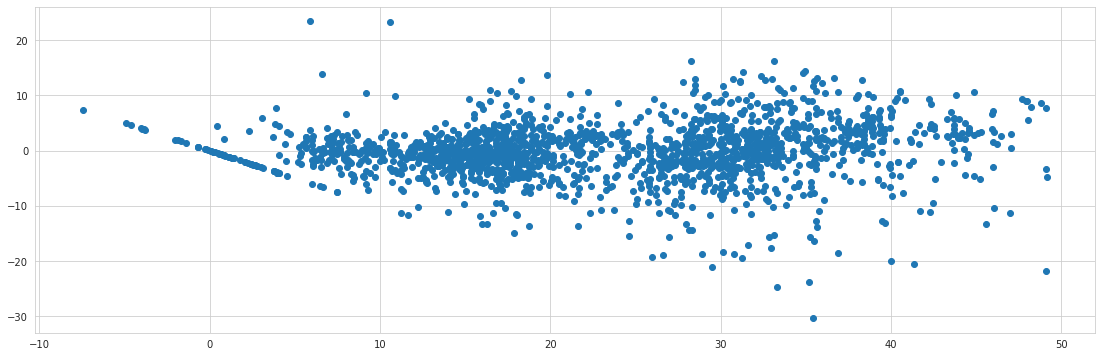

In [195]:
### Heteroscadacity
plt.scatter((y_pred_test_g),(y_test)-(y_pred_test_g))

In [196]:
gb_model.feature_importances_

array([0.32115477, 0.00131429, 0.02790688, 0.08979776, 0.04234718,
       0.12136363, 0.00314162, 0.2161237 , 0.00223491, 0.17461526])

In [197]:
importances = gb_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [198]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [199]:
importance_df.head()

Feature  Feature Importance
0             Hour                0.32
1       Wind_speed                0.00
2       Visibility                0.03
3   Dew_point_temp                0.09
4  Solar_Radiation                0.04

In [200]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0             Hour                0.32
7          Seasons                0.22
9  Functioning Day                0.17
5         Rainfall                0.12
3   Dew_point_temp                0.09
4  Solar_Radiation                0.04
2       Visibility                0.03
1       Wind_speed                0.00
6         Snowfall                0.00
8          Holiday                0.00

In [201]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [202]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

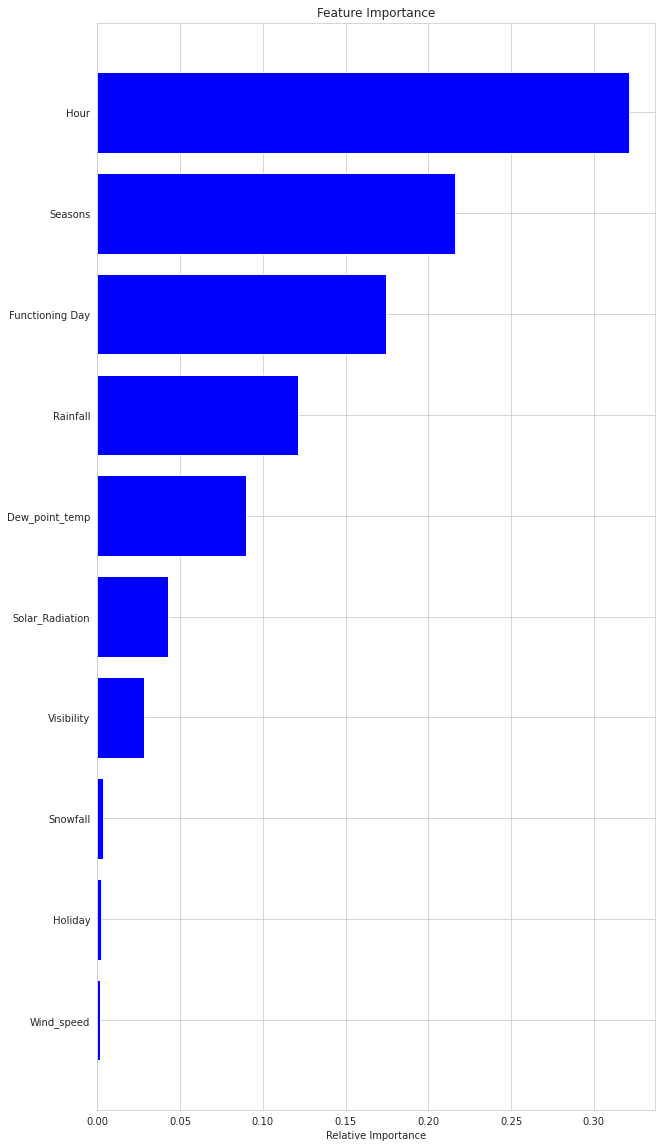

In [203]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()

# **HYPERPARMETER TUNING:**

In [204]:
# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [205]:
param_dict

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}

**IMPORTING GRADIENT BOOSTING REGRESSOR:**

In [206]:
from sklearn.model_selection import GridSearchCV
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,
                       param_grid = param_dict,
                       cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.1s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   1.0s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   0.9s
[CV] END max_depth=4, min_sam

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'max_depth': [4, 6, 8], 'min_samples_leaf': [40, 50],
                         'min_samples_split': [50, 100, 150],
                         'n_estimators': [50, 80, 100]},
             verbose=2)

In [207]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=8, min_samples_leaf=50,
                          min_samples_split=100)

In [208]:
gb_optimal_model = gb_grid.best_estimator_

In [209]:
gb_grid.best_params_

{'max_depth': 8,
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 100}

In [210]:
# Making predictions on train and test data

y_pred_train_g_g = gb_optimal_model.predict(X_train)
y_pred_g_g= gb_optimal_model.predict(X_test)

In [211]:
from sklearn.metrics import mean_squared_error
print("Model Score:",gb_optimal_model.score(X_train,y_train))
MSE_gbh= mean_squared_error(y_train, y_pred_train_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_train, y_pred_train_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score(y_train, y_pred_train_g_g)
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score(y_train, y_pred_train_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

Model Score: 0.9080492041434136
MSE : 14.191053455041041
RMSE : 3.767101465986952
MAE : 2.6468416332106677
R2 : 0.9080492041434136
Adjusted R2 : 0.9075210548277526


In [212]:
# storing the test set metrics value in a dataframe for later comparison
dict1={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
training_df=training_df.append(dict1,ignore_index=True)

In [213]:
from sklearn.metrics import mean_squared_error
MSE_gbh= mean_squared_error(y_test, y_pred_g_g)
print("MSE :",MSE_gbh)

RMSE_gbh=np.sqrt(MSE_gbh)
print("RMSE :",RMSE_gbh)


MAE_gbh= mean_absolute_error(y_test, y_pred_g_g)
print("MAE :",MAE_gbh)


from sklearn.metrics import r2_score
r2_gbh= r2_score((y_test), (y_pred_g_g))
print("R2 :",r2_gbh)
Adjusted_R2_gbh = (1-(1-r2_score(y_test, y_pred_g_g))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )
print("Adjusted R2 :",1-(1-r2_score((y_test), (y_pred_g_g)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)) )

MSE : 20.352357558139644
RMSE : 4.511358726386059
MAE : 3.1042752480413944
R2 : 0.8707674058492033
Adjusted R2 : 0.8700251163940006


In [214]:
# storing the test set metrics value in a dataframe for later comparison
dict2={'Model':'Gradient Boosting gridsearchcv ',
       'MAE':round((MAE_gbh),3),
       'MSE':round((MSE_gbh),3),
       'RMSE':round((RMSE_gbh),3),
       'R2_score':round((r2_gbh),3),
       'Adjusted R2':round((Adjusted_R2_gbh ),2)
      }
test_df=test_df.append(dict2,ignore_index=True)

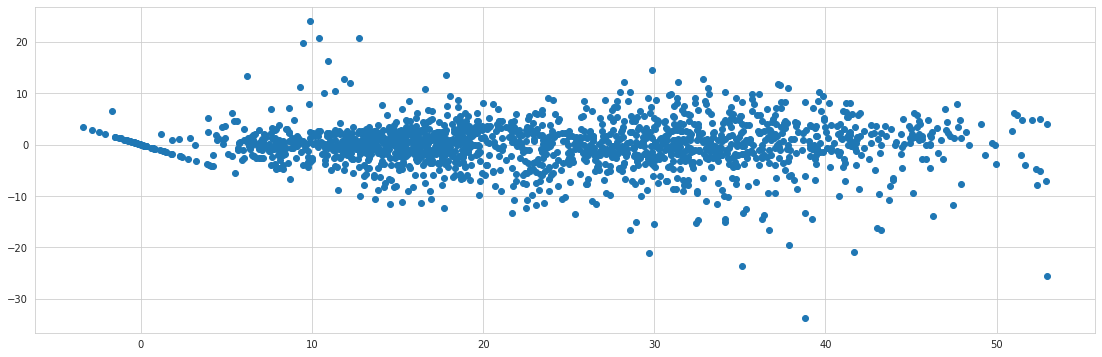

In [215]:
### Heteroscadacity
plt.scatter((y_pred_g_g),(y_test)-(y_pred_g_g))

In [216]:
gb_optimal_model.feature_importances_

array([0.33336978, 0.00608987, 0.03284662, 0.06625783, 0.04198139,
       0.12584506, 0.00321526, 0.21821023, 0.00268487, 0.16949909])

In [217]:
importances = gb_optimal_model.feature_importances_

importance_dict = {'Feature' : list(X_train.columns),
                   'Feature Importance' : importances}

importance_df = pd.DataFrame(importance_dict)

In [218]:
importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)

In [219]:
importance_df.head()

Feature  Feature Importance
0             Hour                0.33
1       Wind_speed                0.01
2       Visibility                0.03
3   Dew_point_temp                0.07
4  Solar_Radiation                0.04

In [220]:
importance_df.sort_values(by=['Feature Importance'],ascending=False)

Feature  Feature Importance
0             Hour                0.33
7          Seasons                0.22
9  Functioning Day                0.17
5         Rainfall                0.13
3   Dew_point_temp                0.07
4  Solar_Radiation                0.04
2       Visibility                0.03
1       Wind_speed                0.01
6         Snowfall                0.00
8          Holiday                0.00

In [221]:
gb_model.fit(X_train,y_train)

GradientBoostingRegressor()

In [222]:
features = X_train.columns
importances = gb_model.feature_importances_
indices = np.argsort(importances)

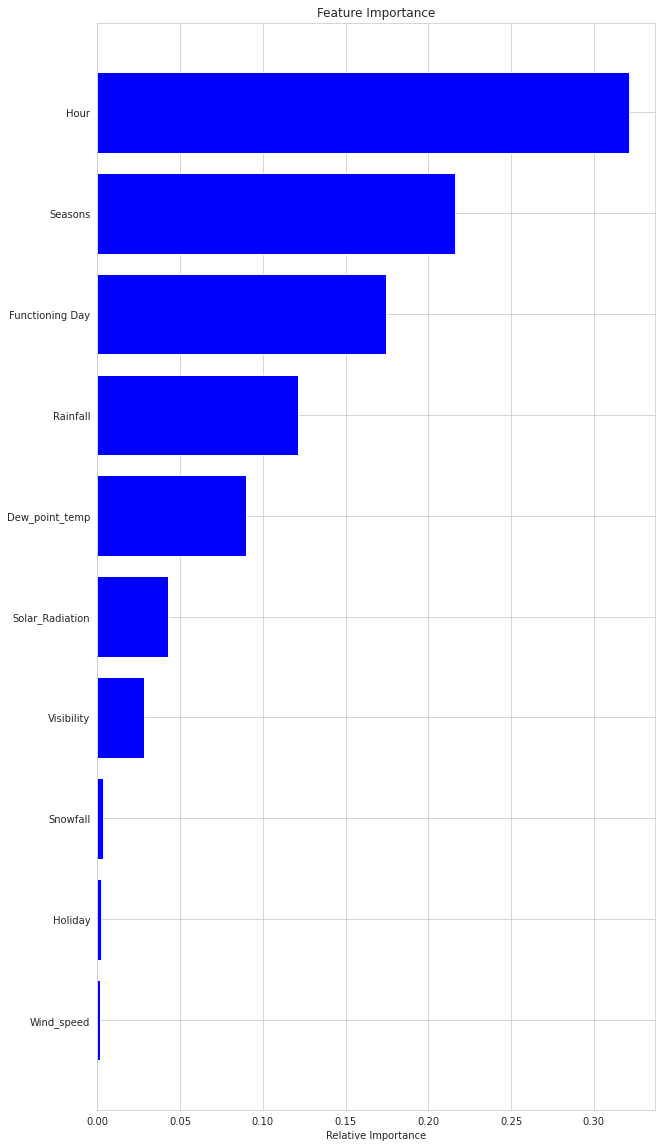

In [223]:
#Plot the figure
plt.figure(figsize=(10,20))
plt.title('Feature Importance')
plt.barh(range(len(indices)), importances[indices], color='blue', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')

plt.show()